## eBOSS configuration files

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import bossdata
import fitsio
import os

import astropy.units as u

In [3]:
from astropy.io import fits
from specsim import config, instrument

In [4]:
bossdata.__version__

'0.2.9dev'

In [5]:
finder = bossdata.path.Finder()
mirror = bossdata.remote.Manager()

In [6]:
plates = [7027, 6963, 7301, 6759, 6002, 6178, 6626, 6882, 7389, 7453, 
          7517, 7276, 6390, 6472, 6660, 6877, 6970, 7451, 6122, 6261]
mjds =  [56448, 56724, 56746, 56416, 56104, 56213, 56330, 56541, 56769, 56749, 
         56772, 57061, 56244, 56362, 56370, 56544, 56444, 56739, 56246, 56219]

### FWHM resolution as a function of wavelength for all fibers in a given plate

In [7]:
fwhm = np.sqrt(8*np.log(2))

def get_hdulist(sequence_number, band, fiber, plan_path):
    local_plan_path = mirror.get(plan_path)
    Plan = bossdata.plate.Plan(local_plan_path)
    exp_name = Plan.get_exposure_name(sequence_number=sequence_number, band=band, fiber=fiber, ftype='spCFrame')
    spec_index = Plan.get_spectrograph_index(fiber=fiber)
    local_fits = mirror.get(os.path.join(plan_path.strip(os.path.basename(plan_path)), exp_name))
    hdulist = fits.open(local_fits)
    Frame = bossdata.plate.FrameFile(path=local_fits, index=spec_index, calibrated=True)
    return(hdulist, Frame.camera)


def plot_cameras(plate, mjd, sequence_number=1, rms=False, plot=True):
    plan_path = finder.get_plate_plan_path(plate=plate, mjd=mjd, combined=True)
    b1_hdulist, b1_title = get_hdulist(sequence_number=sequence_number, band='blue', fiber=30, plan_path=plan_path)
    b2_hdulist, b2_title = get_hdulist(sequence_number=sequence_number, band='blue', fiber=600, plan_path=plan_path)
    r1_hdulist, r1_title = get_hdulist(sequence_number=sequence_number, band='red', fiber=30, plan_path=plan_path)
    r2_hdulist, r2_title = get_hdulist(sequence_number=sequence_number, band='red', fiber=600, plan_path=plan_path)
    if plot:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 11))
        b1_w = 10**b1_hdulist[3].data
        b1_r = b1_hdulist[4].data*0.0001*np.log(10)*b1_w
        b2_w = 10**b2_hdulist[3].data
        b2_r = b2_hdulist[4].data*0.0001*np.log(10)*b2_w
        r1_w = 10**r1_hdulist[3].data
        r1_r = r1_hdulist[4].data*0.0001*np.log(10)*r1_w
        r2_w = 10**r2_hdulist[3].data
        r2_r = r2_hdulist[4].data*0.0001*np.log(10)*r2_w
        
        if rms:
            ax1.scatter(b1_w, b1_r, s=3)
            ax2.scatter(b2_w, b2_r, s=3)
            ax3.scatter(r1_w, r1_r, s=3)
            ax4.scatter(r2_w, r2_r, s=3)
            ax1.set_ylabel('RMS Resolution (Angstrom)')
            ax2.set_ylabel('RMS Resolution (Angstrom)')
            ax3.set_ylabel('RMS Resolution (Angstrom)')
            ax4.set_ylabel('RMS Resolution (Angstrom)')
            
        else:
            ax1.scatter(b1_w, b1_r*fwhm, s=3)
            ax2.scatter(b2_w, b2_r*fwhm, s=3)
            ax3.scatter(r1_w, r1_r*fwhm, s=3)
            ax4.scatter(r2_w, r2_r*fwhm, s=3)
            ax1.set_ylabel('FWHM Resolution (Angstrom)')
            ax2.set_ylabel('FWHM Resolution (Angstrom)')
            ax3.set_ylabel('FWHM Resolution (Angstrom)')
            ax4.set_ylabel('FWHM Resolution (Angstrom)')




        
        ax1.set_title('{:s}'.format(b1_title))
        ax1.set_xlabel('Wavelength (Angstrom)')
        ax2.set_title('{:s}'.format(b2_title))
        ax2.set_xlabel('Wavelength (Angstrom)')
        ax3.set_title('{:s}'.format(r1_title))
        ax3.set_xlabel('Wavelength (Angstrom)')
        ax4.set_title('{:s}'.format(r2_title))
        ax4.set_xlabel('Wavelength (Angstrom)')
        
        
        plt.tight_layout()
        #plt.savefig('plate7301_mjd56746.png')
        plt.show()
        
    return b1_hdulist, b2_hdulist, r1_hdulist, r2_hdulist

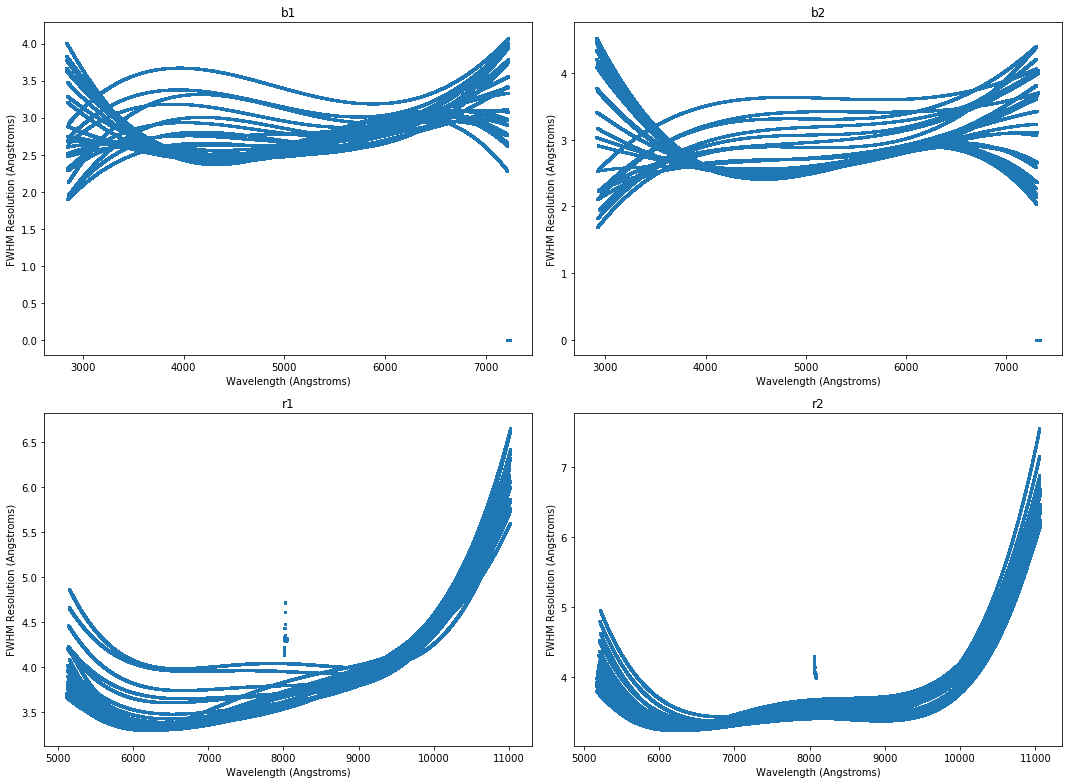

In [286]:
plate = 6641
mjd = 56383
sequence_number = 3

b1_6641, b2_6641, r1_6641, r2_6641 = plot_cameras(plate=plate, mjd=mjd, sequence_number=sequence_number)

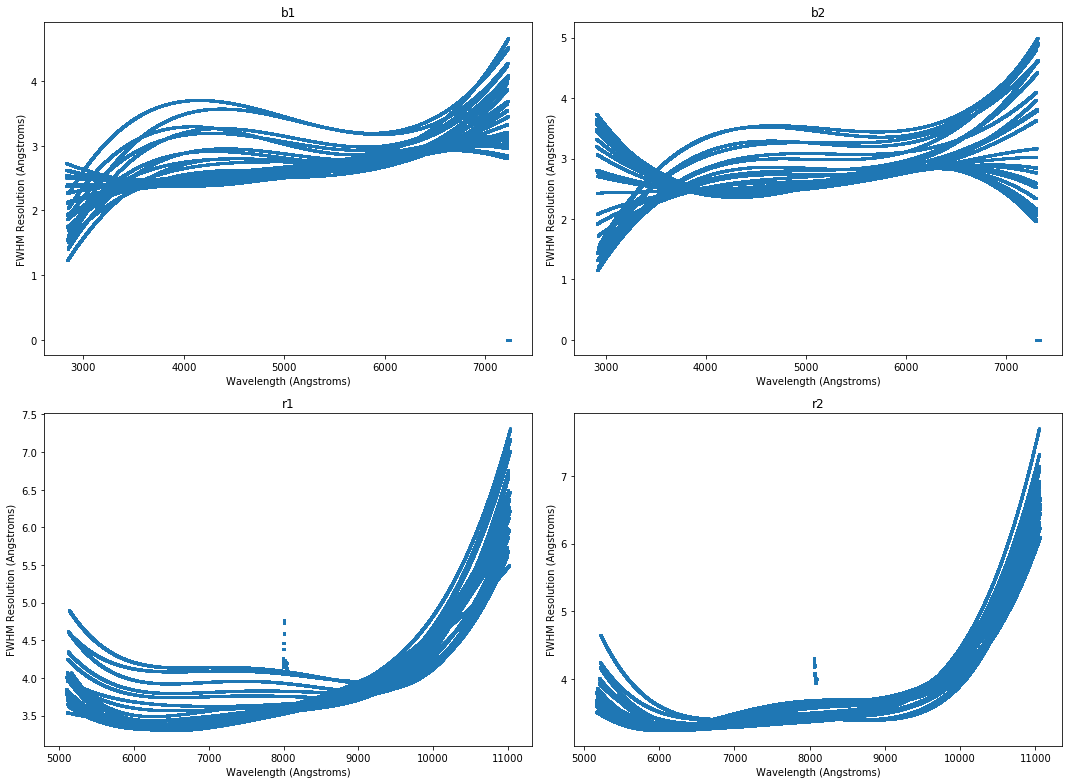

In [327]:
plate = 7426
mjd = 56771
sequence_number = 3

b1_7426, b2_7426, r1_7426, r2_7426 = plot_cameras(plate=plate, mjd=mjd, sequence_number=sequence_number)

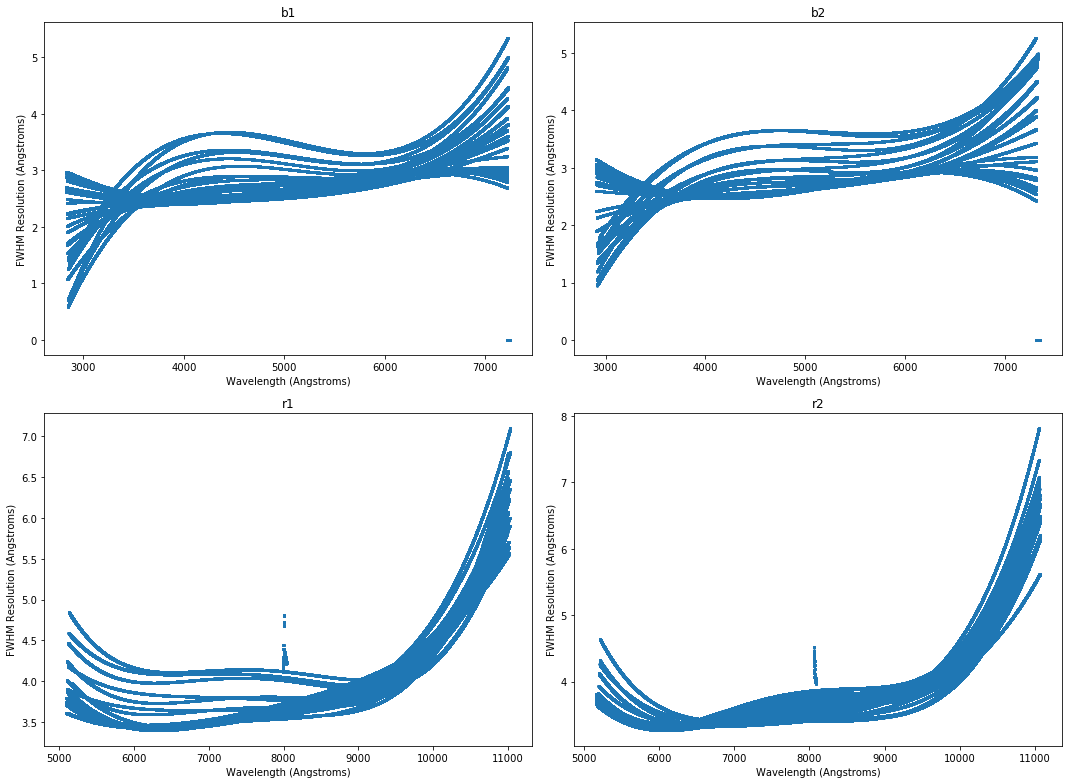

In [299]:
plate = 6963
mjd = 56724
sequence_number = 3

b1_6963, b2_6963, r1_6963, r2_6963 = plot_cameras(plate=plate, mjd=mjd, sequence_number=sequence_number)

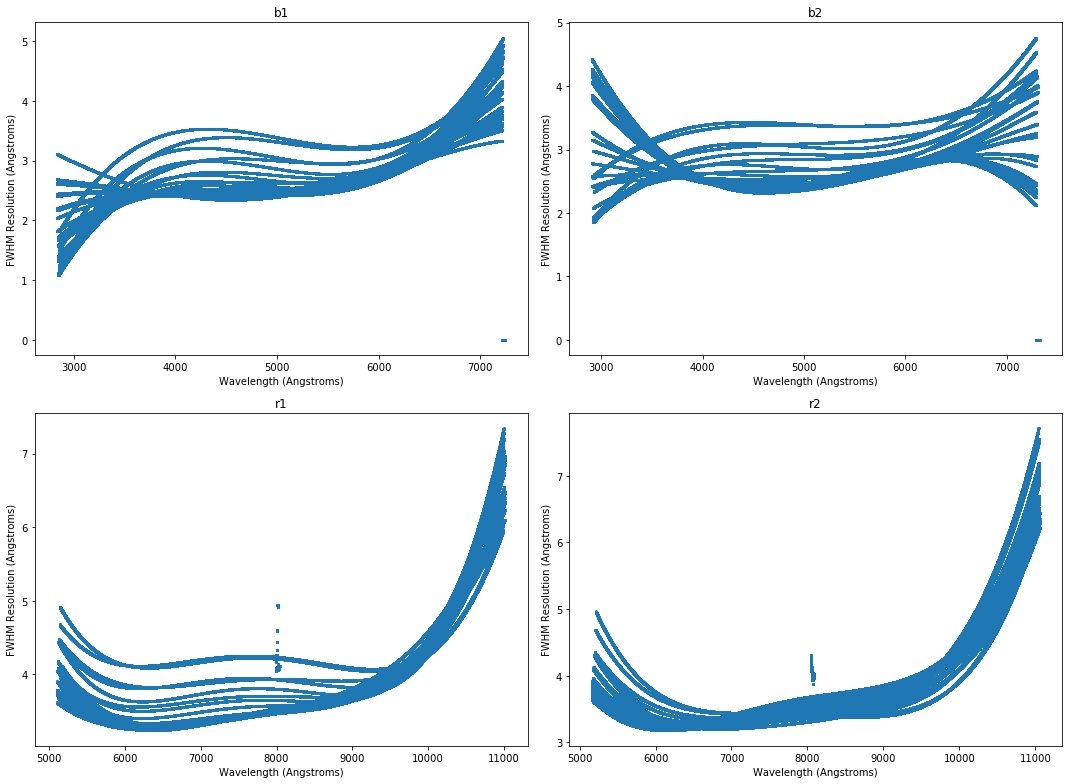

In [300]:
plate = 7027
mjd = 56448
sequence_number = 2

b1_7027, b2_7027, r1_7027, r2_7027 = plot_cameras(plate=plate, mjd=mjd, sequence_number=sequence_number)

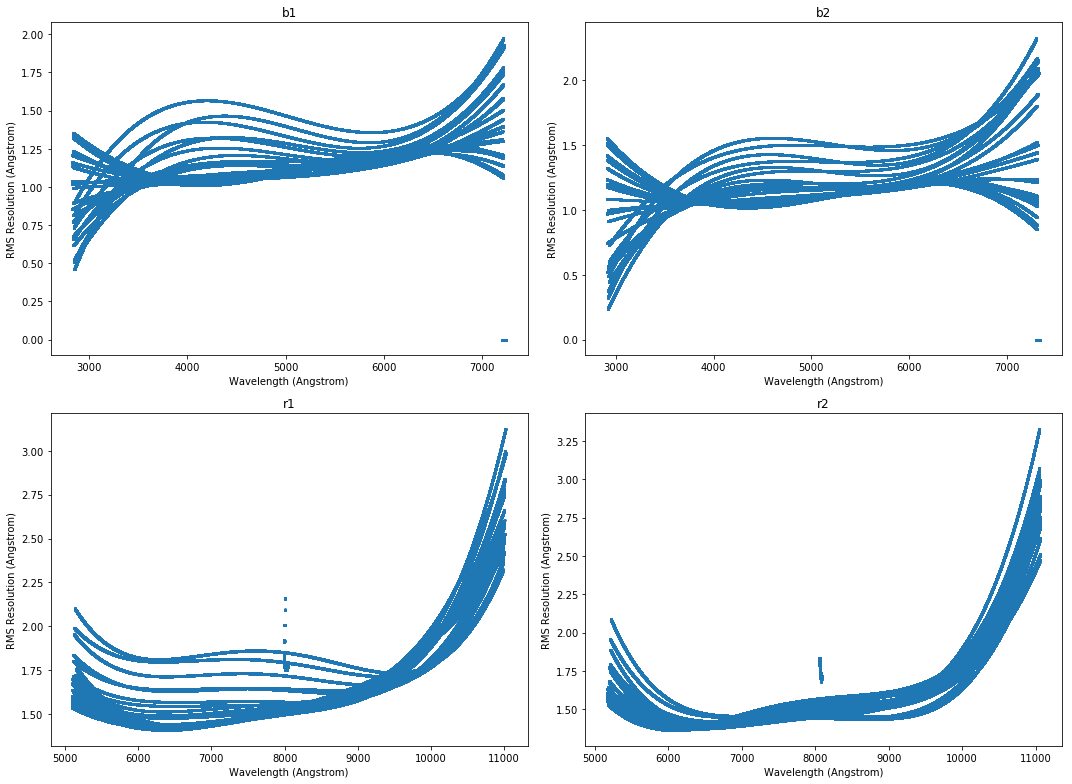

In [107]:
#RMS resolution

plate = 7301
mjd = 56746
sequence_number = 2

b1_7301, b2_7301, r1_7301, r2_7301 = plot_cameras(plate=plate, mjd=mjd, rms=True, sequence_number=sequence_number)

In [17]:
#Test on plate = 7301

wlen = 10**r2_7301[3].data
res = (1/r2_7301[4].data)*fwhm
wlen_range = (wlen > 7900) & (wlen < 8100)
res_range = res < 2.7
bad = wlen_range & res_range

In [32]:
good_pixels = ~bad

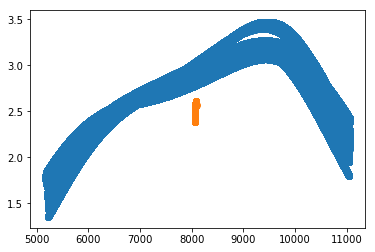

In [91]:
plt.scatter(wlen[~bad], res[~bad])
plt.scatter(wlen[bad], res[bad])

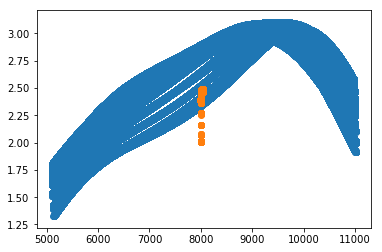

In [93]:
#Test on r1 on same plate
plt.scatter(10**r1_7301[3].data[~bad], ((1/r1_7301[4].data)*fwhm)[~bad])
plt.scatter(10**r1_7301[3].data[bad], ((1/r1_7301[4].data)*fwhm)[bad])

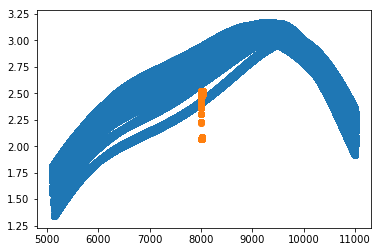

In [94]:
#Test on completely different plate to see whether it's consistent among same indices

plt.scatter(10**r1_7027[3].data[~bad], ((1/r1_7027[4].data)*fwhm)[~bad])
plt.scatter(10**r1_7027[3].data[bad], ((1/r1_7027[4].data)*fwhm)[bad])

In [107]:
#Test on plate = 7027

wlen7027 = 10**r2_7027[3].data
res7027 = (1/r2_7027[4].data)*fwhm
wlen_range7027 = (wlen7027 > 7900) & (wlen7027 < 8100)
res_range7027 = res7027 < 2.7
bad7027 = wlen_range7027 & res_range7027

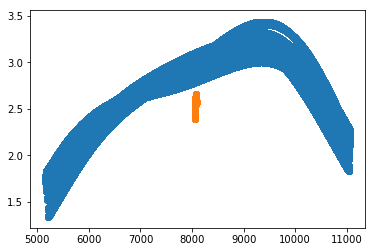

In [108]:
plt.scatter(10**r2_7027[3].data[~bad7027], ((1/r2_7027[4].data)*fwhm)[~bad7027])
plt.scatter(10**r2_7027[3].data[bad7027], ((1/r2_7027[4].data)*fwhm)[bad7027])

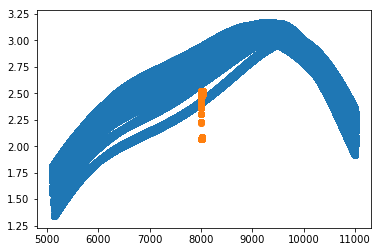

In [109]:
plt.scatter(10**r1_7027[3].data[~bad7027], ((1/r1_7027[4].data)*fwhm)[~bad7027])
plt.scatter(10**r1_7027[3].data[bad7027], ((1/r1_7027[4].data)*fwhm)[bad7027])

In [111]:
np.all(bad == bad7027)

#The artifact can be attributed to a defect in the red ccds

True

http://classic.sdss.org/dr7/dm/flatFiles/spSpec.html

The resolution column is copied from HDU 4 of the spPlate*.fit file. It contains the RMS resolution at each pixel in units of pixels. To get the FWHM resolution, multiply the pixel values by sqrt(8*ln(2)) ∼ 2.35. Since the spectra are binned with constant logarithmic dispersion, the pixel size is fixed in velocity space at 69 km/s = ln(10) * c * 0.0001, where 0.0001 is the log10 dispersion per pixel (stored in the primary header keyword CD1_1). To convert to resolution in wavelength units, multiply by the local pixel size in wavelength units, which is ln(10) * lambda * 0.0001 where lambda is the wavelength of the pixel and 0.0001 is again the log10 dispersion.

### Gather data for each camera over all plates

In [8]:
plates = [7027, 6963, 7301, 6759, 6002, 6178, 6626, 6882, 7389, 7453, 
          7517, 7276, 6390, 6472, 6660, 6877, 6970, 7451, 6122, 6261]
mjds =  [56448, 56724, 56746, 56416, 56104, 56213, 56330, 56541, 56769, 56749, 
         56772, 57061, 56244, 56362, 56370, 56544, 56444, 56739, 56246, 56219]

In [9]:
def combine_cameras(plate, mjd, rms=False):
    
    plate_mjd = zip(plate,mjd)
    
    b1wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    b2wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r1wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r2wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    b1res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    b2res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r1res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r2res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    
    for i, pair in enumerate(plate_mjd):
        b1, b2, r1, r2 = plot_cameras(plate=pair[0], mjd=pair[1], sequence_number=0, 
                                                  plot=False)
                
        b1wlen[i] = 10**b1[3].data
        b2wlen[i] = 10**b2[3].data
        r1wlen[i] = 10**r1[3].data
        r2wlen[i] = 10**r2[3].data

        if rms:
            b1res[i] = b1[4].data*0.0001*np.log(10)*b1wlen[i]
            b2res[i] = b2[4].data*0.0001*np.log(10)*b2wlen[i]
            r1res[i] = r1[4].data*0.0001*np.log(10)*r1wlen[i]
            r2res[i] = r2[4].data*0.0001*np.log(10)*r2wlen[i]
            
        else:
            b1res[i] = b1[4].data*0.0001*np.log(10)*b1wlen[i]*fwhm
            b2res[i] = b2[4].data*0.0001*np.log(10)*b2wlen[i]*fwhm
            r1res[i] = r1[4].data*0.0001*np.log(10)*r1wlen[i]*fwhm
            r2res[i] = r2[4].data*0.0001*np.log(10)*r2wlen[i]*fwhm
                
            
    return(b1wlen, b2wlen, r1wlen, r2wlen, b1res, b2res, r1res, r2res)

In [10]:
b1wlen, b2wlen, r1wlen, r2wlen, b1res, b2res, r1res, r2res = combine_cameras(plates, mjds, rms=True)

## Interpolate resolution on a nominal wavelength grid 

This is so we calcuate the median resolution based on how it scales with wavelength rather than pixel number.

In [11]:
def calculate_wlen_grid(b1wlen, b2wlen,  r1wlen, r2wlen):
    bwlen = np.concatenate((b1wlen, b2wlen), axis=0)
    rwlen = np.concatenate((r1wlen, r2wlen), axis=0)
    return(np.median(bwlen, axis=(0,1)), np.median(rwlen, axis=(0,1)))

In [12]:
bwlen, rwlen = calculate_wlen_grid(b1wlen, b2wlen, r1wlen, r2wlen)

In [20]:
r1wlen.shape

(20, 500, 4128)

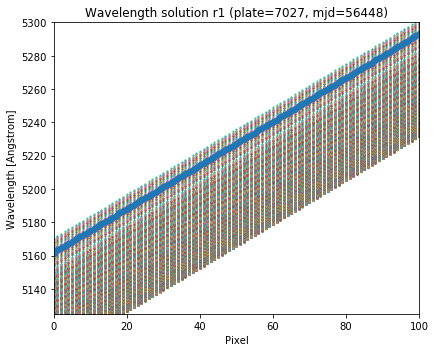

In [24]:
fig = plt.figure(figsize=(6,5))
plt.title('Wavelength solution r1 (plate={}, mjd={})'.format(plates[0], mjds[0]))
plt.xlabel('Pixel')
plt.ylabel('Wavelength [Angstrom]')
plt.tight_layout()

for i in range(500):
    plt.scatter(np.arange(0,4128), r1wlen[0][i], s=1)
plt.scatter(np.arange(0,4128), rwlen)
plt.xlim(0,100)
plt.ylim(5125,5300)
plt.savefig('/Users/belaabolfathi/Desktop/wlen_sol_r1.png')
plt.show()

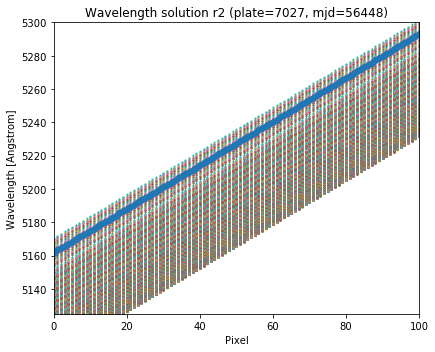

In [25]:
fig = plt.figure(figsize=(6,5))
plt.title('Wavelength solution r2 (plate={}, mjd={})'.format(plates[0], mjds[0]))

plt.xlabel('Pixel')
plt.ylabel('Wavelength [Angstrom]')
plt.tight_layout()

for i in range(500):
    plt.scatter(np.arange(0,4128), r1wlen[0][i], s=1)
plt.scatter(np.arange(0,4128), rwlen)
plt.xlim(0,100)
plt.ylim(5125,5300)
plt.savefig('/Users/belaabolfathi/Desktop/wlen_sol_r2.png')
plt.show()

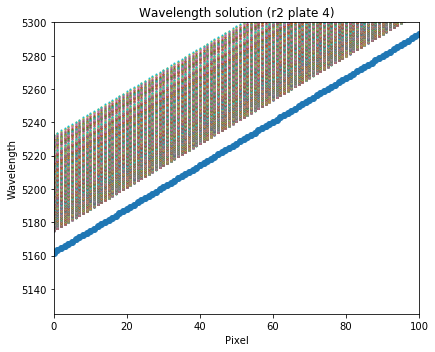

In [318]:
fig = plt.figure(figsize=(6,5))
plt.title('Wavelength solution (r2 plate 4)')
plt.xlabel('Pixel')
plt.ylabel('Wavelength')
plt.tight_layout()

for i in range(500):
    plt.scatter(np.arange(0,4128), r2wlen[4][i], s=1)
plt.scatter(np.arange(0,4128), rwlen)
plt.xlim(0,100)
plt.ylim(5125,5300)
plt.show()

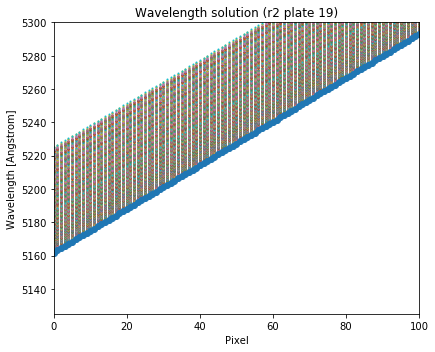

In [23]:
fig = plt.figure(figsize=(6,5))
plt.title('Wavelength solution (r2 plate 19)')
plt.xlabel('Pixel')
plt.ylabel('Wavelength [Angstrom]')
plt.tight_layout()

for i in range(500):
    plt.scatter(np.arange(0,4128), r2wlen[19][i], s=1)
plt.scatter(np.arange(0,4128), rwlen)
plt.xlim(0,100)
plt.ylim(5125,5300)
plt.show()

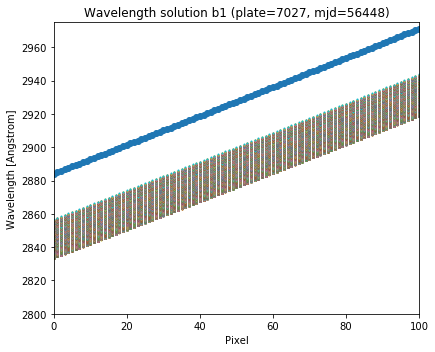

In [22]:
fig = plt.figure(figsize=(6,5))
plt.title('Wavelength solution b1 (plate={}, mjd={})'.format(plates[0], mjds[0]))
plt.xlabel('Pixel')
plt.ylabel('Wavelength [Angstrom]')
plt.tight_layout()

for i in range(500):
    plt.scatter(np.arange(0,4128), b1wlen[0][i], s=1)
plt.scatter(np.arange(0,4128), bwlen)
plt.xlim(0,100)
plt.ylim(2800,2975)
plt.savefig('/Users/belaabolfathi/Desktop/wlen_sol_b1.png')
plt.show()

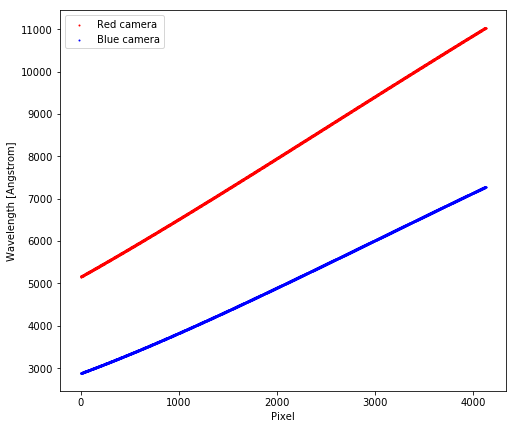

In [60]:
plt.figure(figsize=(8,7))
plt.scatter(np.arange(0,4128), rwlen, c='r', label='Red camera', s=1)
plt.scatter(np.arange(0,4128), bwlen, c='b', label='Blue camera', s=1)
plt.ylabel('Wavelength [Angstrom]')
plt.xlabel('Pixel')
plt.legend()
plt.savefig('wavelength_solution.png')
plt.show()

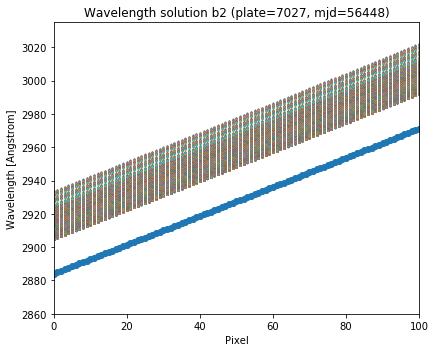

In [32]:
fig = plt.figure(figsize=(6,5))
plt.title('Wavelength solution b2 (plate={}, mjd={})'.format(plates[0], mjds[0]))
plt.xlabel('Pixel')
plt.ylabel('Wavelength [Angstrom]')
plt.tight_layout()

for i in range(500):
    plt.scatter(np.arange(0,4128), b2wlen[6][i], s=1)
plt.scatter(np.arange(0,4128), bwlen)
plt.xlim(0,100)
plt.ylim(2860,3035)
plt.savefig('/Users/belaabolfathi/Desktop/wlen_sol_b2.png')
plt.show()

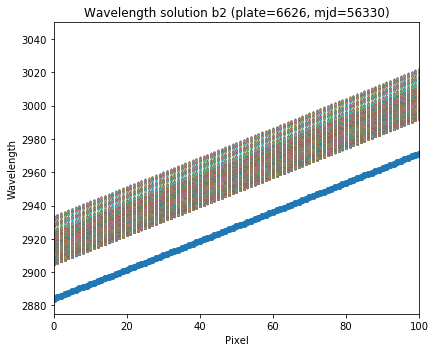

In [43]:
fig = plt.figure(figsize=(6,5))
plt.title('Wavelength solution b2 (plate={}, mjd={})'.format(plates[6], mjds[6]))
plt.xlabel('Pixel')
plt.ylabel('Wavelength')
plt.tight_layout()

for i in range(500):
    plt.scatter(np.arange(0,4128), b2wlen[6][i], s=1)
plt.scatter(np.arange(0,4128), bwlen)
plt.xlim(0,100)
plt.ylim(2875,3050)
plt.show()

In [63]:
bwlen_concat = np.concatenate((b1wlen, b2wlen), axis=1)
rwlen_concat = np.concatenate((r1wlen, r2wlen), axis=1)
bres_concat = np.concatenate((b1res, b2res), axis=1)
rres_concat = np.concatenate((r1res, r2res), axis=1)

In [39]:
def interp_resolution(bwlen_concat, rwlen_concat, bres_concat, rres_concat, bwlen, rwlen):

    b_res = np.empty((20,1000,3988), dtype=float)
    r_res = np.empty((20,1000,3988), dtype=float)
    
    for plate in range(20):
        for fiber in range(1000):
            b_res[plate, fiber] = np.interp(bwlen[60:-80], bwlen_concat[plate][fiber], bres_concat[plate][fiber])
            r_res[plate, fiber] = np.interp(rwlen[60:-80], rwlen_concat[plate][fiber], rres_concat[plate][fiber])
            
    return(b_res, r_res)

In [64]:
b_res, r_res = interp_resolution(bwlen_concat, rwlen_concat, bres_concat, rres_concat, bwlen, rwlen)
bres_interp, rres_interp = np.median(b_res, axis=(0,1)), np.median(r_res, axis=(0,1))

### Plot overlap of multiple plates for each camera

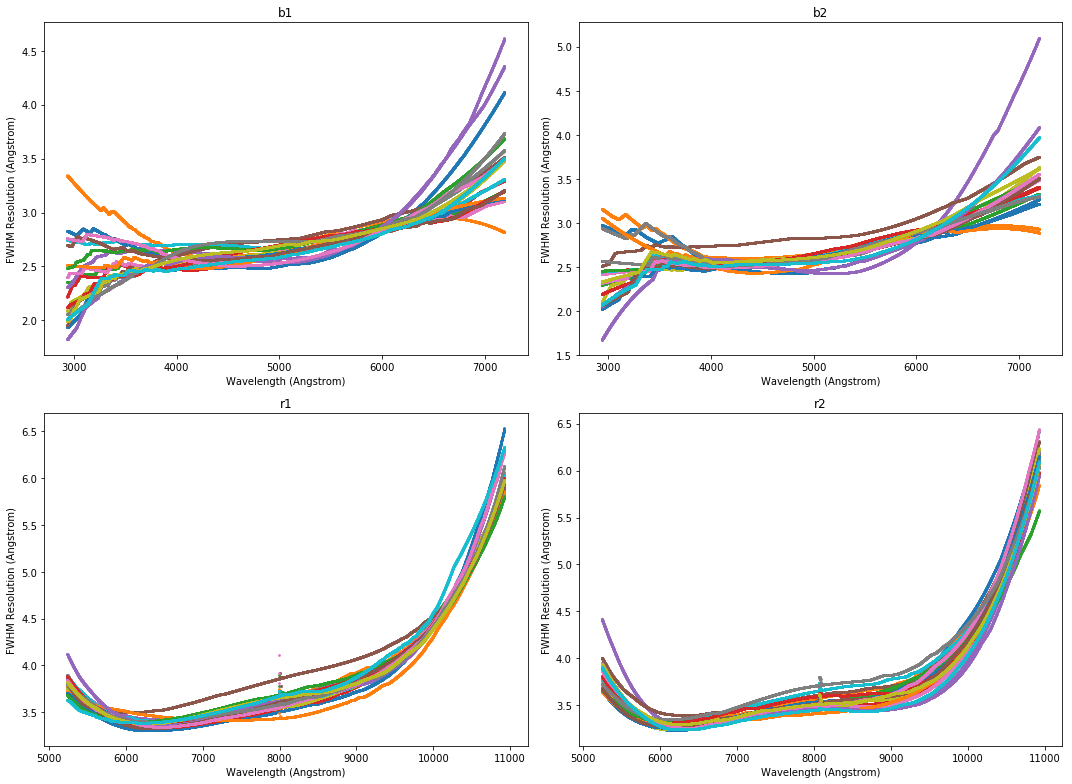

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 11))
    
fwhm = np.sqrt(8*np.log(2))

for plate in range(20):
    ax1.scatter(bwlen[60:-80], np.median(b_res[plate][:500], axis=0), s=3)
    ax1.set_title('b1')
    ax1.set_ylabel('FWHM Resolution (Angstrom)')
    ax1.set_xlabel('Wavelength (Angstrom)')
    ax2.scatter(bwlen[60:-80], np.median(b_res[plate][500:], axis=0), s=3)
    ax2.set_title('b2')
    ax2.set_ylabel('FWHM Resolution (Angstrom)')
    ax2.set_xlabel('Wavelength (Angstrom)')
    ax3.scatter(rwlen[60:-80], np.median(r_res[plate][:500], axis=0), s=3)
    ax3.set_title('r1')
    ax3.set_ylabel('FWHM Resolution (Angstrom)')
    ax3.set_xlabel('Wavelength (Angstrom)')
    ax4.scatter(rwlen[60:-80], np.median(r_res[plate][500:], axis=0), s=3)
    ax4.set_title('r2')
    ax4.set_ylabel('FWHM Resolution (Angstrom)')
    ax4.set_xlabel('Wavelength (Angstrom)')

plt.tight_layout()
#plt.savefig('multiple_plates.png')

## Median of interpolated resolution values on wavelength grid

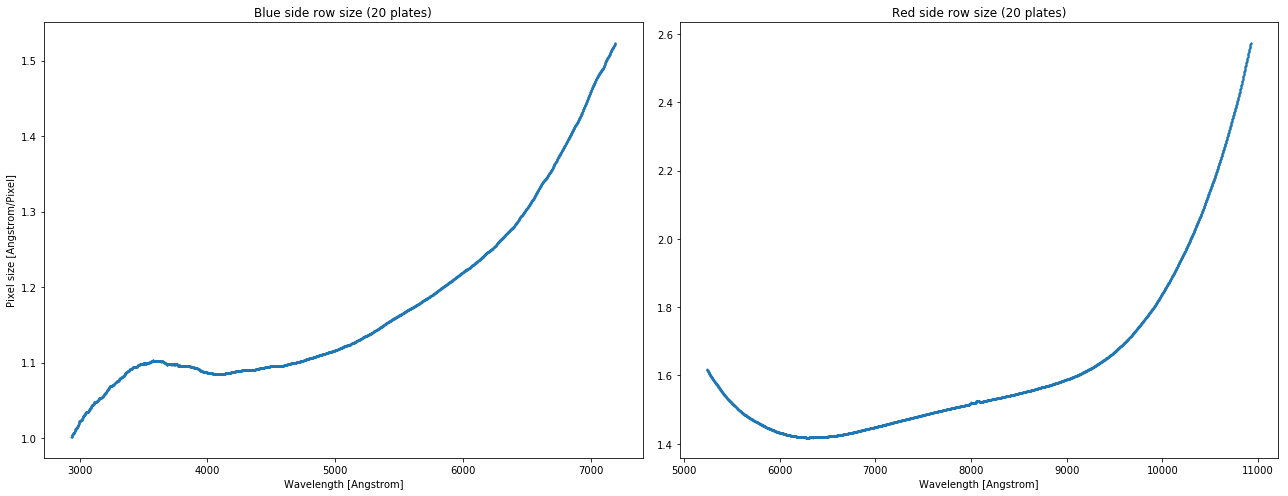

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,7))
ax1.scatter(bwlen[60:-80], bres_interp, s=1)
ax2.scatter(rwlen[60:-80], rres_interp, s=1)
ax1.set_title('Blue side row size (20 plates)')
ax1.set_xlabel('Wavelength [Angstrom]')
ax1.set_ylabel('Pixel size [Angstrom/Pixel]')
ax2.set_title('Red side row size (20 plates)')
ax2.set_xlabel('Wavelength [Angstrom]')
plt.tight_layout()
plt.savefig('resolution.png')

### Blue Camera

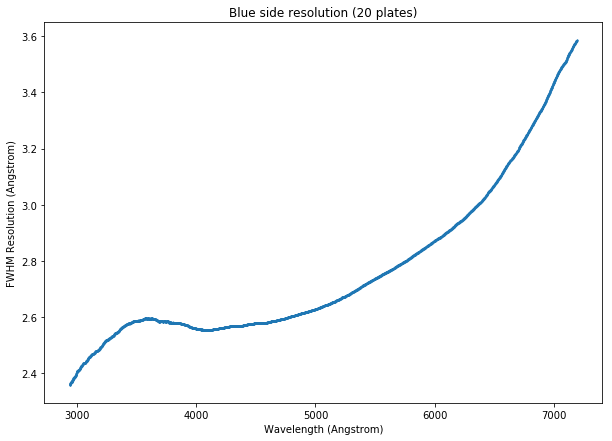

In [378]:
plt.figure(figsize=(10,7))
plt.scatter(bwlen[60:-80], bres_interp, s=1)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('FWHM Resolution (Angstrom)')
plt.title('Blue side resolution (20 plates)')
plt.savefig('blue_res.png')
plt.show()

### Red Camera

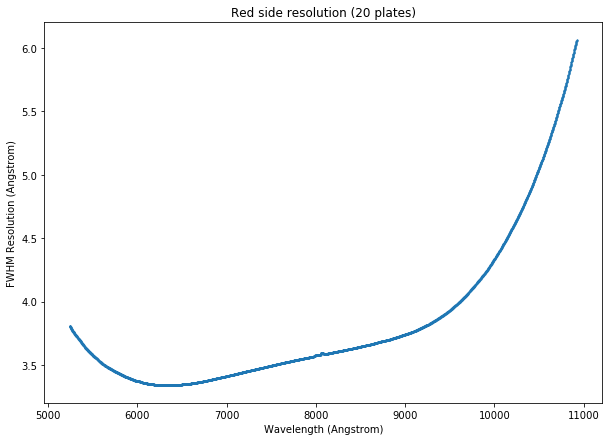

In [377]:
plt.figure(figsize=(10,7))
plt.scatter(rwlen[60:-80], rres_interp, s=1)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('FWHM Resolution (Angstrom)')
plt.title('Red side resolution (20 plates)')
plt.savefig('red_res.png')
plt.show()

## Row Size

In [33]:
def plot_row_width(plate, mjd, sequence_number=1, plot=True):
    plan_path = finder.get_plate_plan_path(plate=plate, mjd=mjd, combined=True)
    b1_hdulist, b1_title = get_hdulist(sequence_number=sequence_number, band='blue', fiber=30, plan_path=plan_path)
    b2_hdulist, b2_title = get_hdulist(sequence_number=sequence_number, band='blue', fiber=600, plan_path=plan_path)
    r1_hdulist, r1_title = get_hdulist(sequence_number=sequence_number, band='red', fiber=30, plan_path=plan_path)
    r2_hdulist, r2_title = get_hdulist(sequence_number=sequence_number, band='red', fiber=600, plan_path=plan_path)
    if plot:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 11))
        b1_w = 10**b1_hdulist[3].data
        b1_r = np.gradient(b1_w, axis=1)
        b2_w = 10**b2_hdulist[3].data
        b2_r = np.gradient(b2_w, axis=1)
        r1_w = 10**r1_hdulist[3].data
        r1_r = np.gradient(r1_w, axis=1)
        r2_w = 10**r2_hdulist[3].data
        r2_r = np.gradient(r2_w, axis=1)
        
        ax1.scatter(b1_w, b1_r, s=3)
        ax2.scatter(b2_w, b2_r, s=3)
        ax3.scatter(r1_w, r1_r, s=3)
        ax4.scatter(r2_w, r2_r, s=3)
        
        ax1.set_title('{:s}'.format(b1_title))
        ax1.set_xlabel('Wavelength (Angstrom)')
        ax1.set_ylabel('FWHM Resolution (Angstrom)') # wrong label?
        ax2.set_title('{:s}'.format(b2_title))
        ax2.set_xlabel('Wavelength (Angstrom)')
        ax2.set_ylabel('FWHM Resolution (Angstrom)')
        ax3.set_title('{:s}'.format(r1_title))
        ax3.set_xlabel('Wavelength (Angstrom)')
        ax3.set_ylabel('FWHM Resolution (Angstrom)')
        ax4.set_title('{:s}'.format(r2_title))
        ax4.set_xlabel('Wavelength (Angstrom)')
        ax4.set_ylabel('FWHM Resolution (Angstrom)')
        
        
        plt.tight_layout()
        #plt.savefig('plate7301_mjd56746.png')
        plt.show()
        
    return b1_hdulist, b2_hdulist, r1_hdulist, r2_hdulist

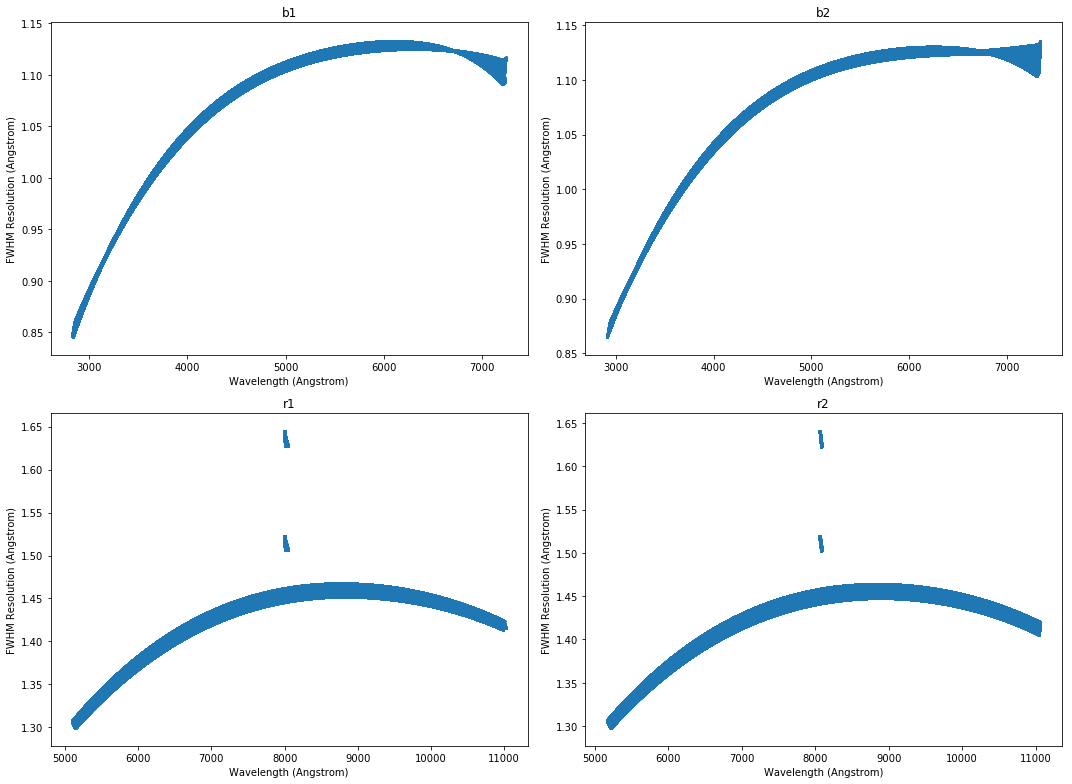

In [12]:
plate = 7301
mjd = 56746
sequence_number = 2

b1_7301, b2_7301, r1_7301, r2_7301 = plot_row_width(plate=plate, mjd=mjd, sequence_number=sequence_number)

In [34]:
def combine_cameras_row_width(plate, mjd):
    
    plate_mjd = zip(plate,mjd)
    
    b1wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    b2wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r1wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r2wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    b1res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    b2res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r1res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r2res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    
    for i, pair in enumerate(plate_mjd):
        b1, b2, r1, r2 = plot_cameras(plate=pair[0], mjd=pair[1], sequence_number=0, 
                                                  plot=False)
                
        b1wlen[i] = 10**b1[3].data
        b2wlen[i] = 10**b2[3].data
        r1wlen[i] = 10**r1[3].data
        r2wlen[i] = 10**r2[3].data


        
        b1res[i] = np.gradient(b1wlen[i], axis=1)
        b2res[i] = np.gradient(b2wlen[i], axis=1)
        r1res[i] = np.gradient(r1wlen[i], axis=1)
        r2res[i] = np.gradient(r2wlen[i], axis=1)
                
            
    return(b1wlen, b2wlen, r1wlen, r2wlen, b1res, b2res, r1res, r2res)

In [35]:
b1wlen, b2wlen, r1wlen, r2wlen, b1width, b2width, r1width, r2width = combine_cameras_row_width(plates, mjds)

In [36]:
bwlen, rwlen = calculate_wlen_grid(b1wlen, b2wlen, r1wlen, r2wlen)

In [37]:
bwlen_concat = np.concatenate((b1wlen, b2wlen), axis=1)
rwlen_concat = np.concatenate((r1wlen, r2wlen), axis=1)
bwidth_concat = np.concatenate((b1width, b2width), axis=1)
rwidth_concat = np.concatenate((r1width, r2width), axis=1)

In [40]:
b_width, r_width = interp_resolution(bwlen_concat, rwlen_concat, bwidth_concat, rwidth_concat, bwlen, rwlen)
bwidth_interp, rwidth_interp = np.median(b_width, axis=(0,1)), np.median(r_width, axis=(0,1))

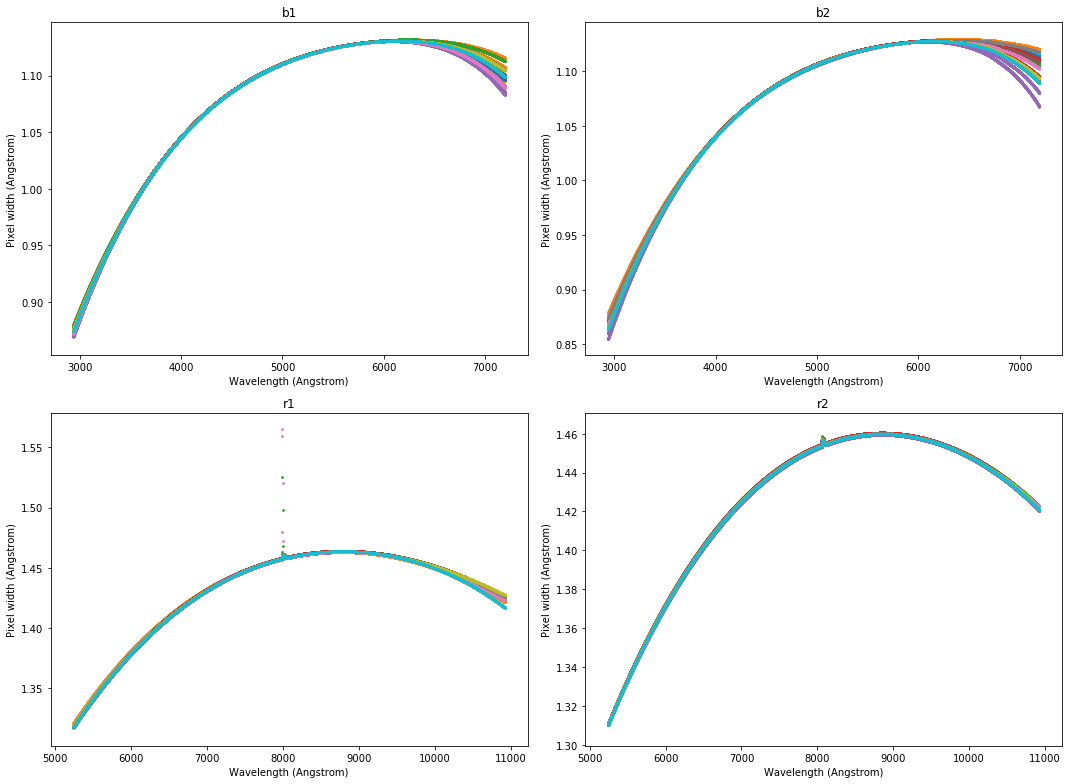

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 11))
    
fwhm = np.sqrt(8*np.log(2))

for plate in range(20):
    ax1.scatter(bwlen[60:-80], np.median(b_width[plate][:500], axis=0), s=3)
    ax1.set_title('b1')
    ax1.set_ylabel('Pixel width (Angstrom)')
    ax1.set_xlabel('Wavelength (Angstrom)')
    ax2.scatter(bwlen[60:-80], np.median(b_width[plate][500:], axis=0), s=3)
    ax2.set_title('b2')
    ax2.set_ylabel('Pixel width (Angstrom)')
    ax2.set_xlabel('Wavelength (Angstrom)')
    ax3.scatter(rwlen[60:-80], np.median(r_width[plate][:500], axis=0), s=3)
    ax3.set_title('r1')
    ax3.set_ylabel('Pixel width (Angstrom)')
    ax3.set_xlabel('Wavelength (Angstrom)')
    ax4.scatter(rwlen[60:-80], np.median(r_width[plate][500:], axis=0), s=3)
    ax4.set_title('r2')
    ax4.set_ylabel('Pixel width (Angstrom)')
    ax4.set_xlabel('Wavelength (Angstrom)')
    
#plt.savefig('multiple_plates_row_size.png')
plt.tight_layout()

## Median of interpolated resolution values on wavelength grid

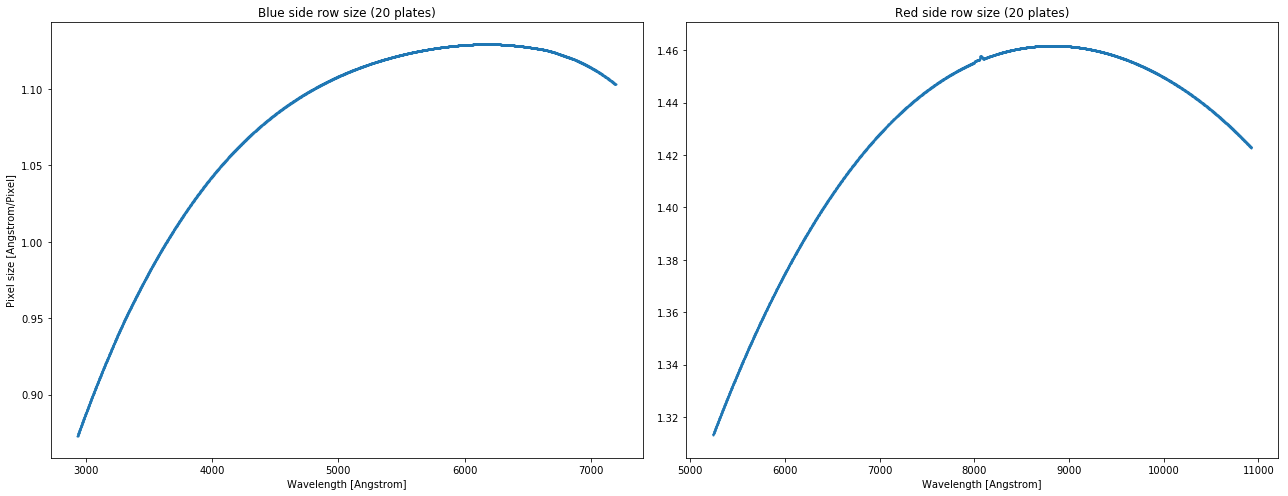

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,7))
ax1.scatter(bwlen[60:-80], bwidth_interp, s=1)
ax2.scatter(rwlen[60:-80], rwidth_interp, s=1)
ax1.set_title('Blue side row size (20 plates)')
ax1.set_xlabel('Wavelength [Angstrom]')
ax1.set_ylabel('Pixel size [Angstrom/Pixel]')
ax2.set_title('Red side row size (20 plates)')
ax2.set_xlabel('Wavelength [Angstrom]')
plt.tight_layout()
plt.savefig('row_size.png')

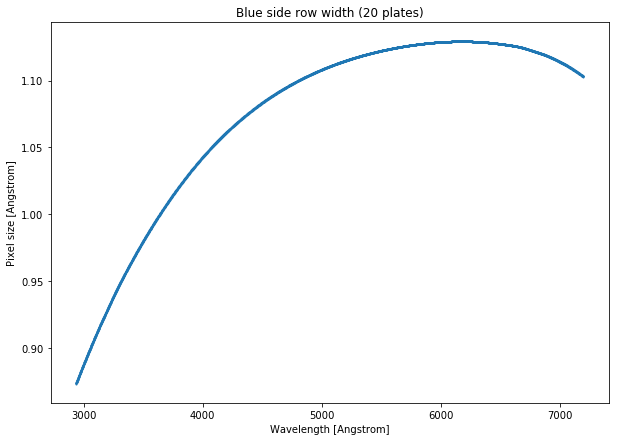

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(bwlen[60:-80], bwidth_interp, s=1)
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Pixel size [Angstrom]')
plt.title('Blue side row width (20 plates)')
plt.savefig('blue_width.png')
plt.show()

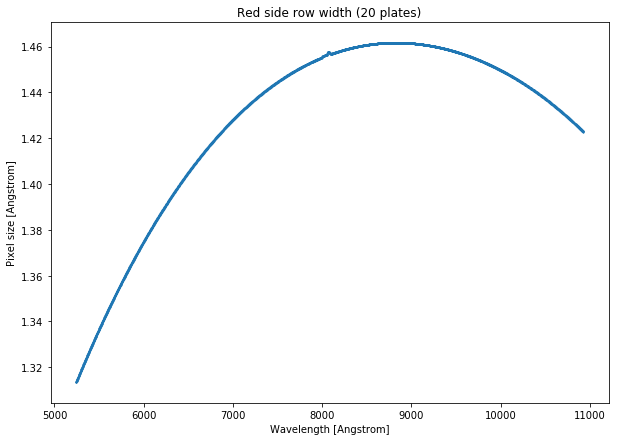

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(rwlen[60:-80], rwidth_interp, s=1)
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Pixel size [Angstrom]')
plt.title('Red side row width (20 plates)')
plt.savefig('red_width.png')
plt.show()

## Compare w/ DESI Configuration

In [180]:
psf_hdu = fits.open('psf-quicksim.fits')
psf_hdu[3].data

FITS_rec([( 7435. ,  1.91628136,  2.939514  ,  4.24979422,  0.64895353),
       ( 7435.5,  1.91625612,  2.9393808 ,  4.24948745,  0.64894197),
       ( 7436. ,  1.91619671,  2.93924778,  4.24918106,  0.64891886), ...,
       ( 9833. ,  1.89991708,  3.05077968,  4.48093781,  0.54554111),
       ( 9833.5,  1.89999675,  3.05108448,  4.48154661,  0.54552019),
       ( 9834. ,  1.90011289,  3.05138957,  4.48215582,  0.54550973)], 
      dtype=(numpy.record, [('wavelength', '>f8'), ('fwhm_wave', '>f8'), ('fwhm_spatial', '>f8'), ('neff_spatial', '>f8'), ('angstroms_per_row', '>f8')]))

In [182]:
psf_hdu[1].data['wavelength'].shape
len(bwlen)

4128

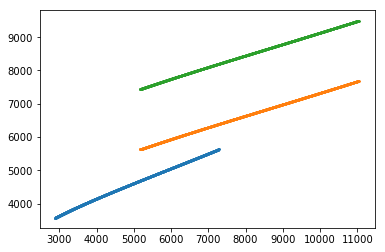

In [191]:
plt.scatter(bwlen, psf_hdu[1].data['wavelength'][:4128], s=1)
plt.scatter(rwlen, psf_hdu[2].data['wavelength'][:4128], s=1)
plt.scatter(rwlen, psf_hdu[3].data['wavelength'][:4128], s=1)
#plt.plot(np.arange(0, len(bwlen)), bwlen, c='b')
plt.show()

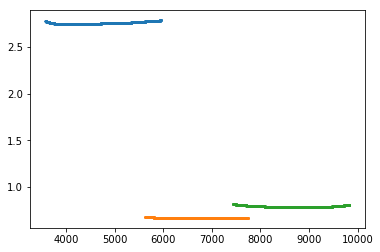

In [202]:
plt.scatter(psf_hdu[1].data['wavelength'], psf_hdu[1].data['fwhm_spatial'], s=1)
plt.scatter(psf_hdu[2].data['wavelength'], psf_hdu[2].data['fwhm_wave']/fwhm, s=1)
plt.scatter(psf_hdu[3].data['wavelength'], psf_hdu[3].data['fwhm_wave']/fwhm, s=1)
plt.show()

In [5]:
fwhm = np.sqrt(8*np.log(2))
fwhm*0.8

1.8838560360247596

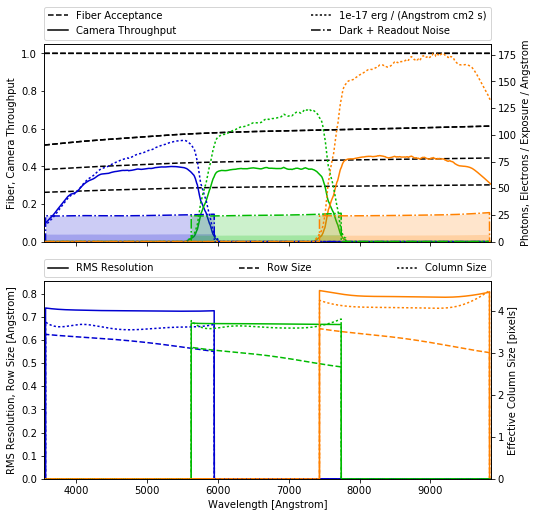

In [58]:
config = config.load_config('desi')
instrument.initialize(config).plot()

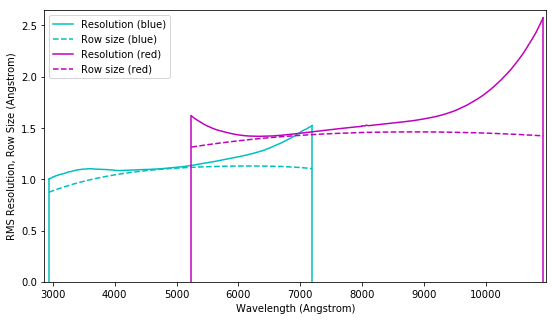

In [132]:
fig = plt.figure(figsize=(9, 5))
#wavelength resolution -- blue
plt.plot(bwlen[60:-80], bres_interp, c='c', label='Resolution (blue)')
plt.plot((bwlen[60], bwlen[60]), (0, bres_interp[0]), c='c')
plt.plot((bwlen[-80], bwlen[-80]), (0, bres_interp[-1]), c='c')

#row size -- blue
plt.plot(bwlen[60:-80], bwidth_interp, c='c', ls='--', label='Row size (blue)')

#wavelength resolution -- red
plt.plot(rwlen[60:-80], rres_interp, c='m', label='Resolution (red)')
plt.plot((rwlen[60], rwlen[60]), (0, rres_interp[0]), c='m')
plt.plot((rwlen[-80], rwlen[-80]), (0, rres_interp[-1]), c='m')


#row size -- red
plt.plot(rwlen[60:-80], rwidth_interp, c='m', ls='--', label='Row size (red)')

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('RMS Resolution, Row Size (Angstrom)')
plt.xlim(bwlen[60]-75,rwlen[-80]+50)
plt.ylim(0,2.65)
plt.legend()
#plt.savefig('instrument_config_rms.png')
plt.show()

## neff

https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/PLATE4/spFlat.html

In [67]:
def plot_neff(plate, mjd, fiber, plot=True):
    
    remote_plate_spec_path = finder.get_plate_spec_path(plate=plate, mjd=mjd)
    plate_spec_path = mirror.get(remote_plate_spec_path)
    PlateFile = bossdata.plate.PlateFile(plate_spec_path)    
    
    exp_nameb1 = PlateFile.exposures.get_exposure_name(exposure_index=1, camera='b1', 
                                                     ftype='spFlat')
    exp_nameb2 = PlateFile.exposures.get_exposure_name(exposure_index=1, camera='b2', 
                                                     ftype='spFlat')
    exp_namer1 = PlateFile.exposures.get_exposure_name(exposure_index=1, camera='r1', 
                                                     ftype='spFlat')
    exp_namer2 = PlateFile.exposures.get_exposure_name(exposure_index=1, camera='r2', 
                                                     ftype='spFlat')

    remote_plate_path_b1 = finder.get_plate_path(plate=plate, filename=exp_nameb1)
    remote_plate_path_b2 = finder.get_plate_path(plate=plate, filename=exp_nameb2)
    remote_plate_path_r1 = finder.get_plate_path(plate=plate, filename=exp_namer1)
    remote_plate_path_r2 = finder.get_plate_path(plate=plate, filename=exp_namer2)
    
    plate_path_b1 = mirror.get(remote_plate_path_b1)
    plate_path_b2 = mirror.get(remote_plate_path_b2)
    plate_path_r1 = mirror.get(remote_plate_path_r1)
    plate_path_r2 = mirror.get(remote_plate_path_r2)

    hdulist_b1 = fitsio.FITS(plate_path_b1, mode=fitsio.READONLY)
    hdulist_b2 = fitsio.FITS(plate_path_b2, mode=fitsio.READONLY)
    hdulist_r1 = fitsio.FITS(plate_path_r1, mode=fitsio.READONLY)
    hdulist_r2 = fitsio.FITS(plate_path_r2, mode=fitsio.READONLY)
    
    TraceSet_b1 = bossdata.plate.TraceSet(hdulist_b1[3])
    TraceSet_b2 = bossdata.plate.TraceSet(hdulist_b2[3])
    TraceSet_r1 = bossdata.plate.TraceSet(hdulist_r1[3])
    TraceSet_r2 = bossdata.plate.TraceSet(hdulist_r2[3])

    if plot:

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,7), sharex=True)
        
        ax1.plot(TraceSet_b1.get_y()[fiber], 'o')
        ax1.set_title('b1')
        ax1.set_ylabel('Pixel')
        ax2.plot(TraceSet_b2.get_y()[fiber], 'o')
        ax2.set_title('b2')
        ax3.plot(TraceSet_r1.get_y()[fiber], 'o')
        ax3.set_title('r1')
        ax3.set_xlabel('Pixel')
        ax3.set_ylabel('Pixel')
        ax4.plot(TraceSet_r2.get_y()[fiber], 'o')
        ax4.set_title('r2')
        ax4.set_xlabel('Pixel')

        plt.tight_layout()
        plt.show()
    
    return TraceSet_b1, TraceSet_b2, TraceSet_r1, TraceSet_r2

## plate 7027, mjd 56448

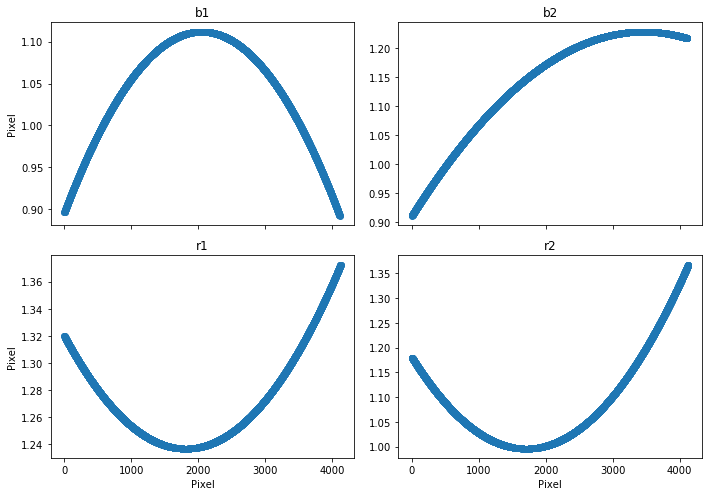

In [160]:
b1, b2, r1, r2 = plot_neff(plate=plates[0], mjd=mjds[0], fiber=0)

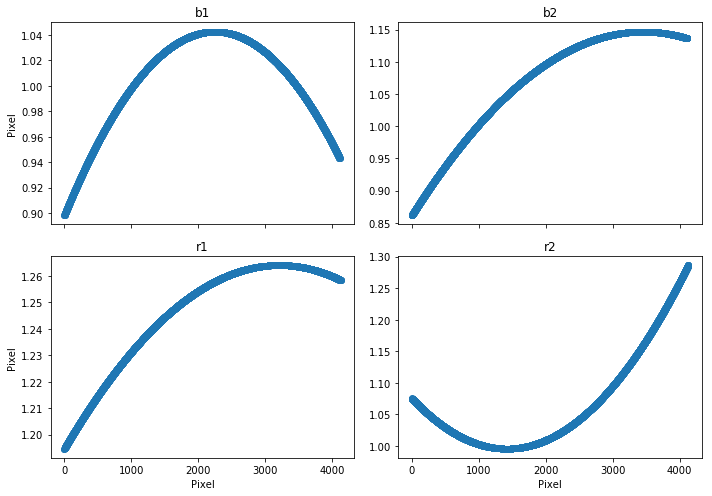

In [91]:
b1, b2, r1, r2 = plot_neff(plate=plates[0], mjd=mjds[0], fiber=20)

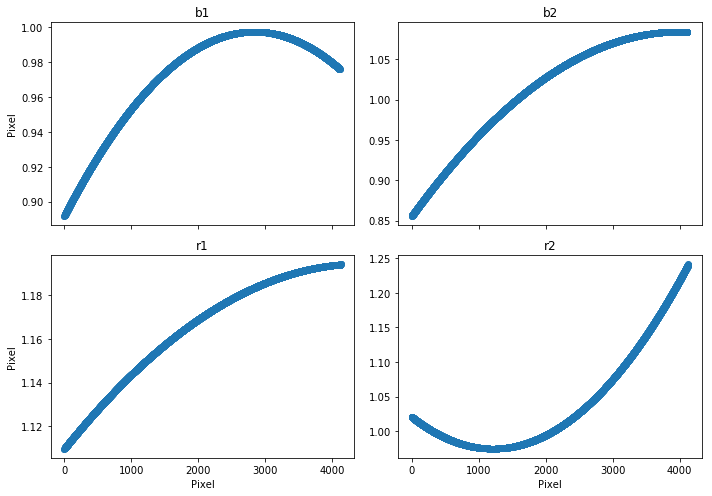

In [37]:
plot_neff(plate=plates[0], mjd=mjds[0], fiber=50)

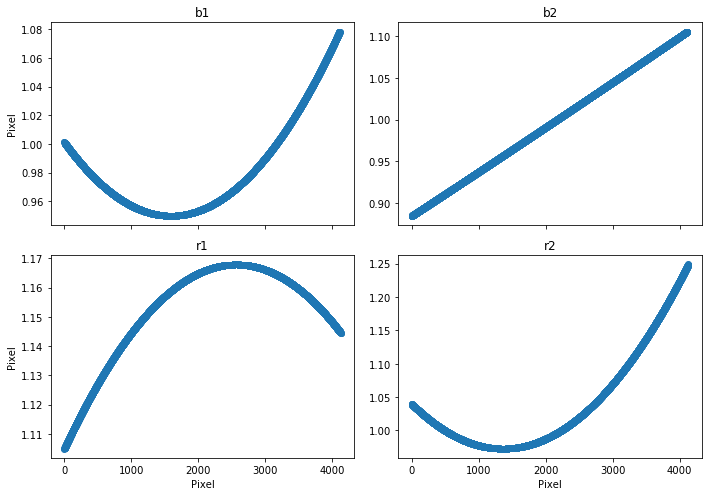

In [38]:
plot_neff(plate=plates[0], mjd=mjds[0], fiber=75)

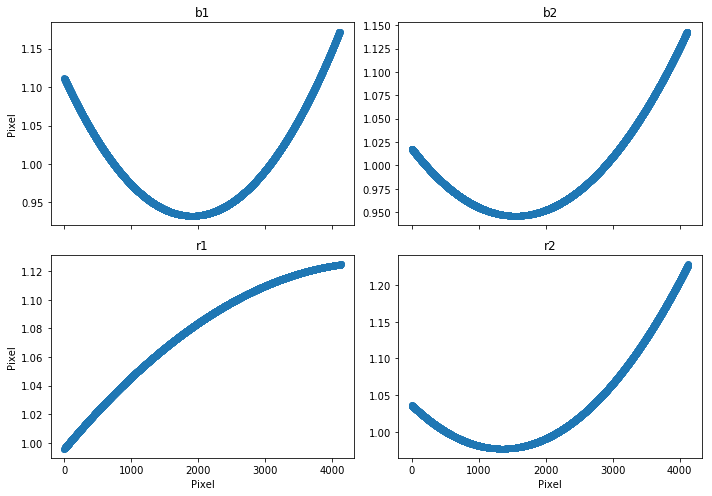

In [39]:
plot_neff(plate=plates[0], mjd=mjds[0], fiber=100)

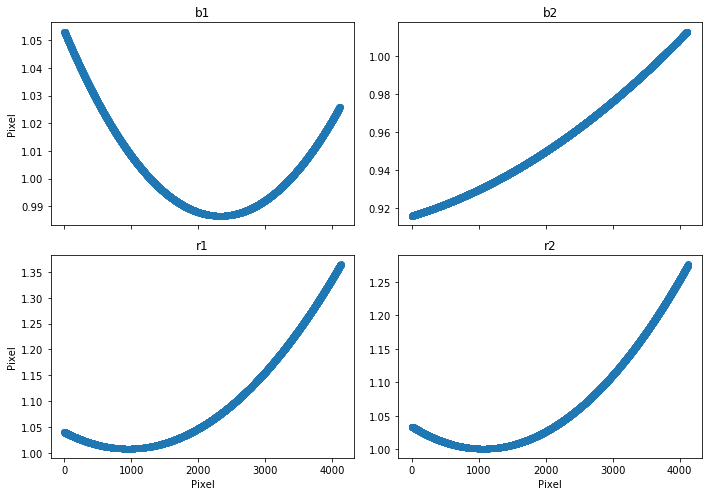

In [40]:
plot_neff(plate=plates[0], mjd=mjds[0], fiber=400)

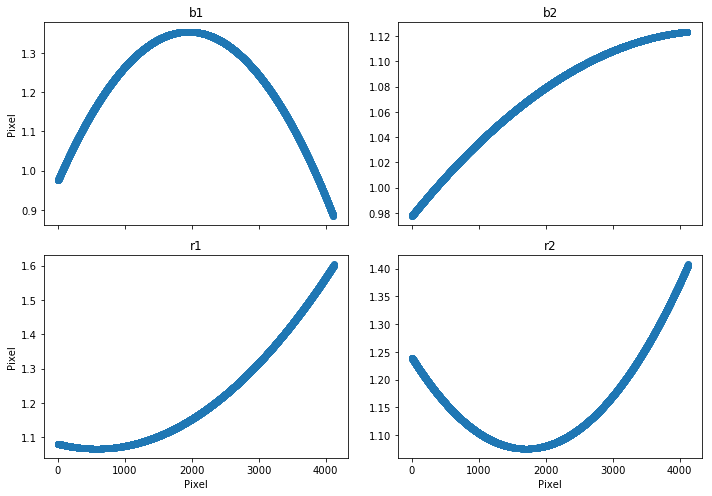

In [41]:
plot_neff(plate=plates[0], mjd=mjds[0], fiber=499)

#### Fibers are bundled in groups of 20

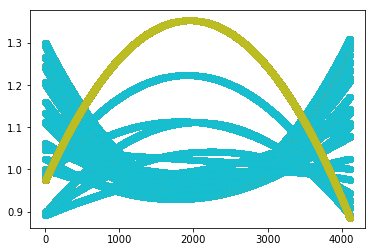

((4112,), (4112,), (4128,), (4128,))


In [94]:
#color-code by fiber bundle (every 20 fibers)

for i in range(499):
    b1, b2, r1, r2 = plot_neff(plate=plates[0], mjd=mjds[0], fiber=i, plot=False)
    plt.plot(b1, 'o')
plt.show()
print(b1.shape, b2.shape, r1.shape, r2.shape)

In [82]:
# blue cameras have length 4112, red have 4128

In [81]:
bwlen.shape, rwlen.shape

((4128,), (4128,))

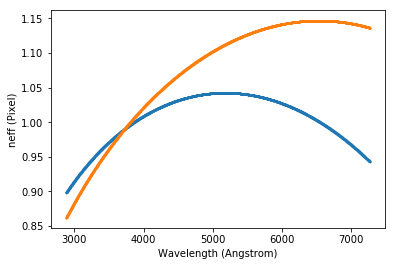

In [92]:
plt.scatter(bwlen[:4112], b1, s=1)
plt.scatter(bwlen[:4112], b2, s=1)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('neff (Pixel)')
plt.show()

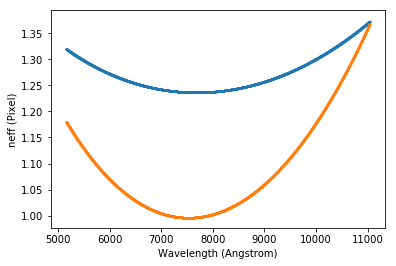

In [111]:
plt.scatter(rwlen, r1, s=1)
plt.scatter(rwlen, r2, s=1)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('neff (Pixel)')
plt.show()

In [ ]:
#for interpolation, use same nominal wlen grid, and same concatenated wavelength soln as above
#is it ok to cut off last 16 pixels on blue sides?

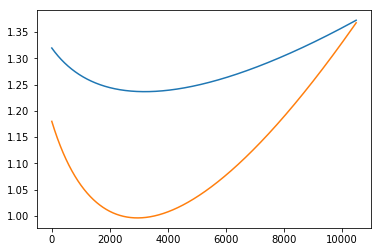

In [112]:
plt.plot(np.arange(0,4128)*0.0001*np.log(10)*rwlen, r1)
plt.plot(np.arange(0,4128)*0.0001*np.log(10)*rwlen, r2)

In [97]:
rwlen

array([  5161.80832153,   5163.11280622,   5164.41771707, ...,
        11034.30246311,  11035.71442276,  11037.12633174])

In [102]:
b1hdu, b2hdu, r1hdu, r2hdu = plot_cameras(plates[0], mjds[0], sequence_number=1, rms=False, plot=False)

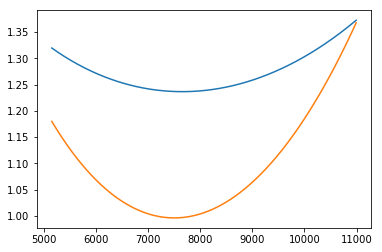

In [113]:
plt.plot(10**r1hdu[3].data[0], r1)
plt.plot(10**r1hdu[3].data[0], r2)

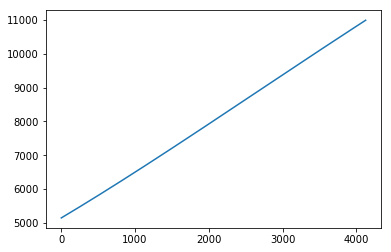

In [114]:
plt.plot(np.arange(0,4128), 10**r1hdu[3].data[0])

## Compute all at once

In [68]:
def plot_neff(plate, mjd, fiber, plot=True):
    
    remote_plate_spec_path = finder.get_plate_spec_path(plate=plate, mjd=mjd)
    plate_spec_path = mirror.get(remote_plate_spec_path)
    PlateFile = bossdata.plate.PlateFile(plate_spec_path)    
    
    exp_nameb1 = PlateFile.exposures.get_exposure_name(exposure_index=1, camera='b1', 
                                                     ftype='spFlat')
    exp_nameb2 = PlateFile.exposures.get_exposure_name(exposure_index=1, camera='b2', 
                                                     ftype='spFlat')
    exp_namer1 = PlateFile.exposures.get_exposure_name(exposure_index=1, camera='r1', 
                                                     ftype='spFlat')
    exp_namer2 = PlateFile.exposures.get_exposure_name(exposure_index=1, camera='r2', 
                                                     ftype='spFlat')

    remote_plate_path_b1 = finder.get_plate_path(plate=plate, filename=exp_nameb1)
    remote_plate_path_b2 = finder.get_plate_path(plate=plate, filename=exp_nameb2)
    remote_plate_path_r1 = finder.get_plate_path(plate=plate, filename=exp_namer1)
    remote_plate_path_r2 = finder.get_plate_path(plate=plate, filename=exp_namer2)
    
    plate_path_b1 = mirror.get(remote_plate_path_b1)
    plate_path_b2 = mirror.get(remote_plate_path_b2)
    plate_path_r1 = mirror.get(remote_plate_path_r1)
    plate_path_r2 = mirror.get(remote_plate_path_r2)

    hdulist_b1 = fitsio.FITS(plate_path_b1, mode=fitsio.READONLY)
    hdulist_b2 = fitsio.FITS(plate_path_b2, mode=fitsio.READONLY)
    hdulist_r1 = fitsio.FITS(plate_path_r1, mode=fitsio.READONLY)
    hdulist_r2 = fitsio.FITS(plate_path_r2, mode=fitsio.READONLY)
    
    TraceSet_b1 = bossdata.plate.TraceSet(hdulist_b1[3])
    TraceSet_b2 = bossdata.plate.TraceSet(hdulist_b2[3])
    TraceSet_r1 = bossdata.plate.TraceSet(hdulist_r1[3])
    TraceSet_r2 = bossdata.plate.TraceSet(hdulist_r2[3])

    if plot:

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,7), sharex=True)
        
        ax1.plot(TraceSet_b1.get_y()[fiber], 'o')
        ax1.set_title('b1')
        ax1.set_ylabel('Pixel')
        ax2.plot(TraceSet_b2.get_y()[fiber], 'o')
        ax2.set_title('b2')
        ax3.plot(TraceSet_r1.get_y()[fiber], 'o')
        ax3.set_title('r1')
        ax3.set_xlabel('Pixel')
        ax3.set_ylabel('Pixel')
        ax4.plot(TraceSet_r2.get_y()[fiber], 'o')
        ax4.set_title('r2')
        ax4.set_xlabel('Pixel')

        plt.tight_layout()
        plt.show()
    
    return TraceSet_b1, TraceSet_b2, TraceSet_r1, TraceSet_r2


def calculate_wlen_grid(b1wlen, b2wlen,  r1wlen, r2wlen):
    bwlen = np.concatenate((b1wlen, b2wlen), axis=0)
    rwlen = np.concatenate((r1wlen, r2wlen), axis=0)
    return(np.median(bwlen, axis=(0,1)), np.median(rwlen, axis=(0,1)))


def combine(plate, mjd, fwhm=True):
    
    plate_mjd = zip(plate,mjd)
    
    b1neff = np.empty((len(plate_mjd), 500, 4112), dtype=float)
    b2neff = np.empty((len(plate_mjd), 500, 4112), dtype=float)
    r1neff = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r2neff = np.empty((len(plate_mjd), 500, 4128), dtype=float)        

    b1wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    b2wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r1wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r2wlen = np.empty((len(plate_mjd), 500, 4128), dtype=float)

    b1res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    b2res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r1res = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r2res = np.empty((len(plate_mjd), 500, 4128), dtype=float)

    b1width = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    b2width = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r1width = np.empty((len(plate_mjd), 500, 4128), dtype=float)
    r2width = np.empty((len(plate_mjd), 500, 4128), dtype=float)
        
    
    
    for i, pair in enumerate(plate_mjd):
        
            
        b1TraceSet, b2TraceSet, r1TraceSet, r2TraceSet = plot_neff(plate=pair[0], 
                    mjd=pair[1], fiber=0, plot=False)

        b1neff[i] = b1TraceSet.get_y()
        b2neff[i] = b2TraceSet.get_y()
        r1neff[i] = r1TraceSet.get_y()
        r2neff[i] = r2TraceSet.get_y()
        
        
            
        b1, b2, r1, r2 = plot_cameras(plate=pair[0], mjd=pair[1], sequence_number=0, 
                                                  plot=False)
        
        b1wlen[i] = 10**b1[3].data
        b2wlen[i] = 10**b2[3].data
        r1wlen[i] = 10**r1[3].data
        r2wlen[i] = 10**r2[3].data
            

        
        b1width[i] = np.gradient(b1wlen[i], axis=1)
        b2width[i] = np.gradient(b2wlen[i], axis=1)
        r1width[i] = np.gradient(r1wlen[i], axis=1)
        r2width[i] = np.gradient(r2wlen[i], axis=1)

                
        b1res[i] = b1[4].data*0.0001*np.log(10)*b1wlen[i]
        b2res[i] = b2[4].data*0.0001*np.log(10)*b2wlen[i]
        r1res[i] = r1[4].data*0.0001*np.log(10)*r1wlen[i]
        r2res[i] = r2[4].data*0.0001*np.log(10)*r2wlen[i]
                
        if fwhm:
        
            b1res[i] = b1res[i]*fwhm
            b2res[i] = b2res[i]*fwhm
            r1res[i] = r1res[i]*fwhm
            r2res[i] = r2res[i]*fwhm
    
    coef = 2*np.sqrt(np.pi)
                
                
    return(b1wlen, b2wlen, r1wlen, r2wlen, b1res, b2res, r1res, r2res, 
           b1width, b2width, r1width, r2width, coef*b1neff, coef*b2neff, coef*r1neff, coef*r2neff)

In [69]:
b1wlen, b2wlen, r1wlen, r2wlen, b1res, b2res, r1res, r2res, b1width, b2width, r1width, r2width, b1neff, b2neff, r1neff, r2neff = combine(plate=plates, mjd=mjds)

In [70]:
bwlen, rwlen = calculate_wlen_grid(b1wlen, b2wlen, r1wlen, r2wlen)

In [71]:
bwlen_concat = np.concatenate((b1wlen, b2wlen), axis=1)
rwlen_concat = np.concatenate((r1wlen, r2wlen), axis=1)
bres_concat = np.concatenate((b1res, b2res), axis=1)
rres_concat = np.concatenate((r1res, r2res), axis=1)
bwidth_concat = np.concatenate((b1width, b2width), axis=1)
rwidth_concat = np.concatenate((r1width, r2width), axis=1)
bneff_concat = np.concatenate((b1neff, b2neff), axis=1)
rneff_concat = np.concatenate((r1neff, r2neff), axis=1)

In [73]:
def interpolate(bx, rx, bxp, rxp, bfp, rfp, neff=False):

    b_interp = np.empty((20,1000,3988), dtype=float)
    r_interp = np.empty((20,1000,3988), dtype=float)
    
    if neff:
        for plate in range(20):
            for fiber in range(1000):
                b_interp[plate, fiber] = np.interp(bx[60:-80], bxp[plate][fiber][:4112], bfp[plate][fiber])
                r_interp[plate, fiber] = np.interp(rx[60:-80], rxp[plate][fiber], rfp[plate][fiber])
    
    else:
        for plate in range(20):
            for fiber in range(1000):
                b_interp[plate, fiber] = np.interp(bx[60:-80], bxp[plate][fiber], bfp[plate][fiber])
                r_interp[plate, fiber] = np.interp(rx[60:-80], rxp[plate][fiber], rfp[plate][fiber])
            
    return(b_interp, r_interp)

In [74]:
b_width_interp, r_width_interp = interpolate(bwlen, rwlen, bwlen_concat, rwlen_concat, bwidth_concat, rwidth_concat)
b_res_interp, r_res_interp = interpolate(bwlen, rwlen, bwlen_concat, rwlen_concat, bres_concat, rres_concat)
b_neff_interp, r_neff_interp = interpolate(bwlen, rwlen, bwlen_concat, rwlen_concat, bneff_concat, rneff_concat, neff=True)

#### Take median of each interpolated vector

In [75]:
bwidth_median = np.median(b_width_interp, axis=(0,1))
rwidth_median = np.median(r_width_interp, axis=(0,1))
bres_median = np.median(b_res_interp, axis=(0,1))
rres_median = np.median(r_res_interp, axis=(0,1))
bneff_median = np.median(b_neff_interp, axis=(0,1))
rneff_median = np.median(r_neff_interp, axis=(0,1))

### Plot results

In [322]:
bwlen[60:-80]

array([ 2936.18890129,  2937.06193057,  2937.93516175, ...,  7191.54030849,
        7192.63541349,  7193.730431  ])

In [323]:
rwlen[60:-80]

array([  5240.35592055,   5241.66899785,   5242.98219833, ...,
        10921.22413035,  10922.63908341,  10924.05398828])

#### Row size (pixel size?)

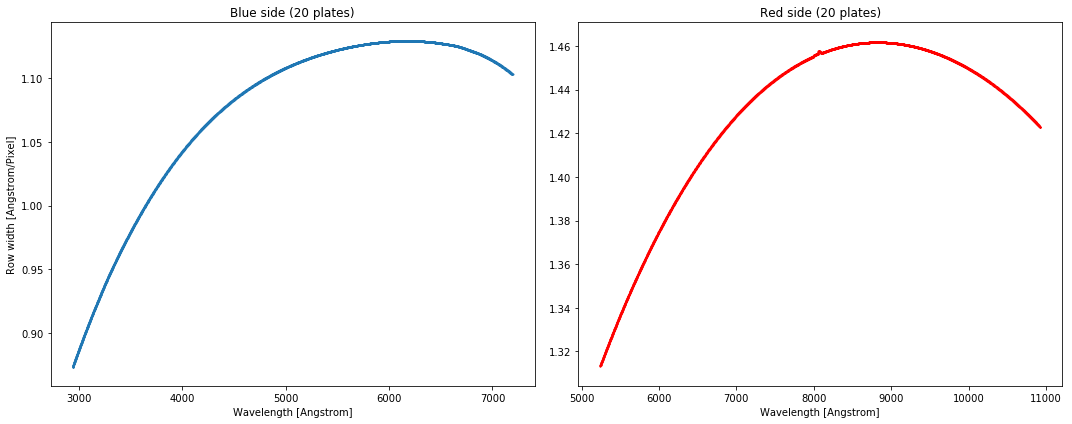

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.scatter(bwlen[60:-80], bwidth_median, s=1)
ax2.scatter(rwlen[60:-80], rwidth_median, s=1, c='r')

ax1.set_title('Blue side (20 plates)')
ax1.set_xlabel('Wavelength [Angstrom]')
ax1.set_ylabel('Row width [Angstrom/Pixel]')
ax2.set_title('Red side (20 plates)')
ax2.set_xlabel('Wavelength [Angstrom]')
plt.tight_layout()
plt.savefig('row_width.png')
plt.show()

#### Resolution (dispersion?)

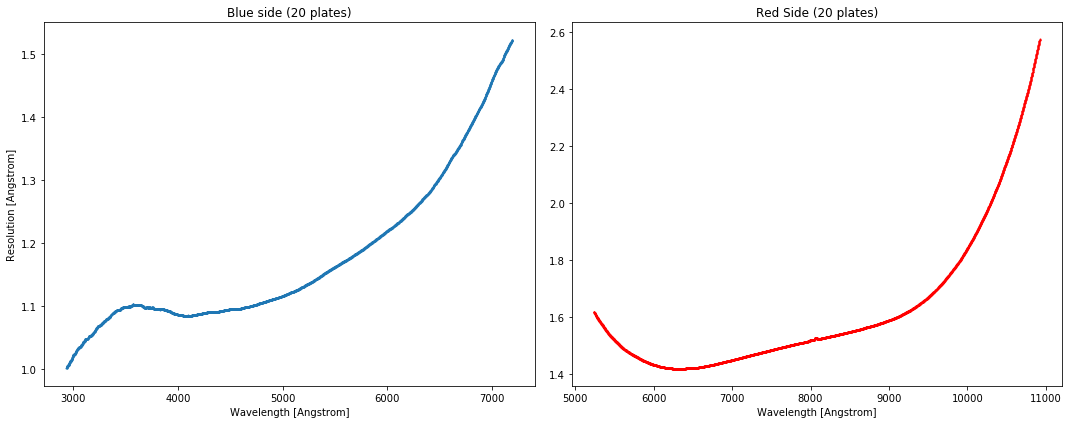

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.scatter(bwlen[60:-80], bres_median, s=1)
ax2.scatter(rwlen[60:-80], rres_median, s=1, c='r')

ax1.set_title('Blue side (20 plates)')
ax1.set_xlabel('Wavelength [Angstrom]')
ax1.set_ylabel('Resolution [Angstrom]')
ax2.set_title('Red Side (20 plates)')
ax2.set_xlabel('Wavelength [Angstrom]')
plt.tight_layout()
plt.savefig('resolution.png')
plt.show()

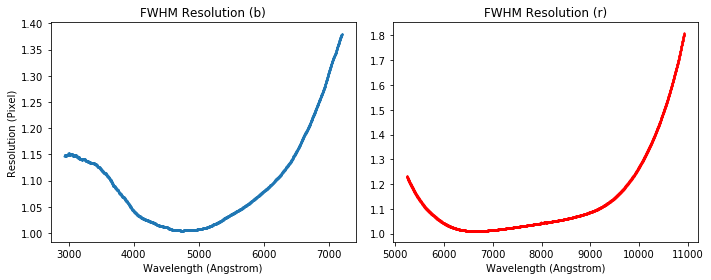

In [40]:
#res in pixels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.scatter(bwlen[60:-80], bres_median/bwidth_median, s=1)
ax2.scatter(rwlen[60:-80], rres_median/rwidth_median, s=1, c='r')

ax1.set_title('FWHM Resolution (b)')
ax1.set_xlabel('Wavelength (Angstrom)')
ax1.set_ylabel('Resolution (Pixel)')
ax2.set_title('FWHM Resolution (r)')
ax2.set_xlabel('Wavelength (Angstrom)')
plt.tight_layout()
plt.show()

#### neff/profile width

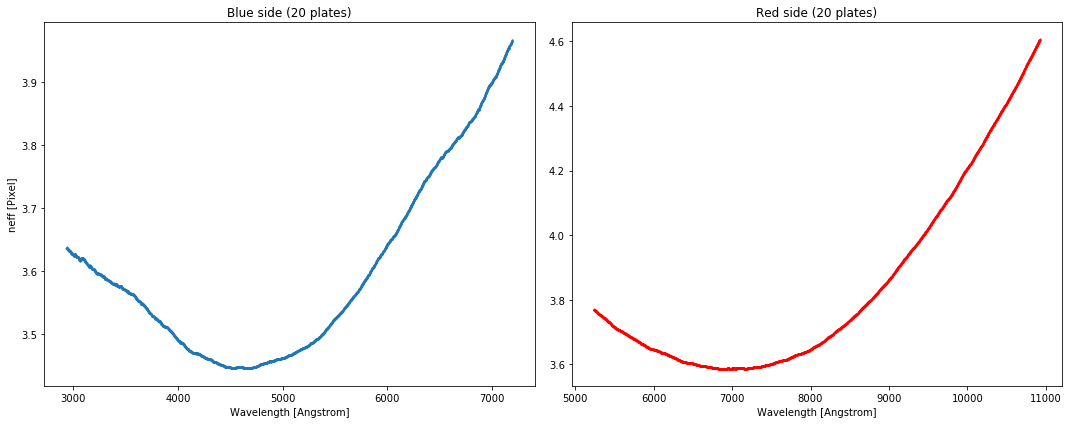

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.scatter(bwlen[60:-80], bneff_median, s=1)
ax2.scatter(rwlen[60:-80], rneff_median, s=1, c='r')

ax1.set_title('Blue side (20 plates)')
ax1.set_xlabel('Wavelength [Angstrom]')
ax1.set_ylabel('neff [Pixel]')
ax2.set_title('Red side (20 plates)')
ax2.set_xlabel('Wavelength [Angstrom]')
plt.tight_layout()
plt.savefig('neff.png')
plt.show()

***Note: didn't get rid of artifact in red ccds at around 8000 Angstroms

#### Spectral resolving power (lambda/FWHM) ??????

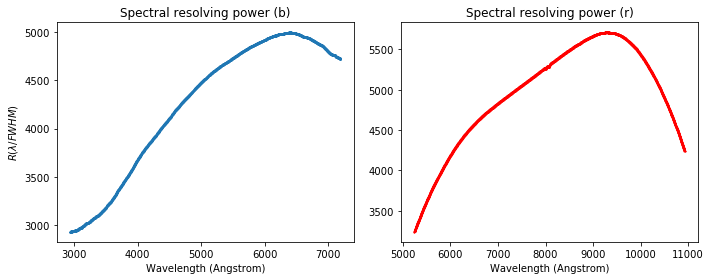

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.scatter(bwlen[60:-80], bwlen[60:-80]/bres_median, s=1)
ax2.scatter(rwlen[60:-80], rwlen[60:-80]/rres_median, s=1, c='r')

ax1.set_title('Spectral resolving power (b)')
ax1.set_xlabel('Wavelength (Angstrom)')
ax1.set_ylabel(r'$R (\lambda/FWHM)$')
ax2.set_title('Spectral resolving power (r)')
ax2.set_xlabel('Wavelength (Angstrom)')
plt.tight_layout()
plt.show()

## Create eBOSS config fits file 

In [228]:
from astropy.table import Table, Column

In [255]:
red_table = Table()
red_table['wavelength'] = Column(rwlen[60:-80], unit='Angstrom')
red_table['fwhm_wave'] = Column(rres_median, unit='Angstrom')
red_table['angstroms_per_row'] = Column(rwidth_median, unit='Angstrom/pixel')
red_table['neff_spatial'] = Column(rneff_median, unit='pixel')

In [256]:
blue_table = Table()
blue_table['wavelength'] = Column(bwlen[60:-80], unit='Angstrom')
blue_table['fwhm_wave'] = Column(bres_median, unit='Angstrom')
blue_table['angstroms_per_row'] = Column(bwidth_median, unit='Angstrom/pixel')
blue_table['neff_spatial'] = Column(bneff_median, unit='pixel')

In [257]:
red_table.write('eboss_red.fits')
blue_table.write('eboss_blue.fits')

### Make temporary throughput file

In [327]:
thru = numpy.ones(len(bwlen[60:-80]))

In [328]:
red_throughput = Table()
blue_throughput = Table()

red_throughput['wavelength'] = Column(rwlen[60:-80], unit='Angstrom')
red_throughput['throughput'] = Column(thru)
blue_throughput['wavelength'] = Column(bwlen[60:-80], unit='Angstrom')
blue_throughput['throughput'] = Column(thru)

In [332]:
red_throughput[:3200].write('eboss_thru_red.fits', overwrite=True)
blue_throughput[788:].write('eboss_thru_blue.fits', overwrite=True)

In [276]:
print(np.min(blue_throughput['wavelength']), np.max(blue_throughput['wavelength']))
print(np.min(red_throughput['wavelength']), np.max(red_throughput['wavelength']))

(2936.1889012856564, 7193.7304310016225)
(5240.3559205529455, 10924.053988277341)


In [300]:
!ls

DECalS Sky Brightness.ipynb  eboss_thru_blue.fits
Figures                      eboss_thru_red.fits
SDSS Sky Brightness.ipynb    noaa_radio_flux.json
Telecon                      psf-quicksim.fits
Telescope Notes.pages        sky.fits
boss-summary.dat             solar_flux.png
decalsobs-zpt-dr3-allv2.fits test_eboss_config.ipynb
eboss_config.ipynb           test_flats.ipynb
eboss_sim.fits               window_flist.fits


In [318]:
red_thru['throughput'][0] = 0.0
red_thru['throughput'][-1] = 0.0
blue_thru['throughput'][0] = 0.0
blue_thru['throughput'][-1] = 0.0

In [329]:
red_thru = red_throughput[:3200]
blue_thru = blue_throughput[788:]

## Compare to DESI configuration

In [44]:
desi_hdulist = fitsio.FITS('psf-quicksim.fits', mode=fitsio.READONLY)

In [46]:
quicksim_b = desi_hdulist[1].read()
quicksim_r = desi_hdulist[2].read()
quicksim_z = desi_hdulist[3].read()

In [221]:
fits['QUICKSIM-R']['wavelength']

  file: eboss_sim.fits
  extension: 2
  type: BINARY_TBL
  rows: 3988
  column subset:
    wavelength          f8  

In [245]:
desi_hdulist['QUICKSIM-R']['wavelength']

  file: psf-quicksim.fits
  extension: 2
  type: BINARY_TBL
  rows: 4233
  column subset:
    wavelength          f8  

In [271]:
quicksim_b['wavelength']

array([ 3569. ,  3569.5,  3570. , ...,  5948. ,  5948.5,  5949. ])

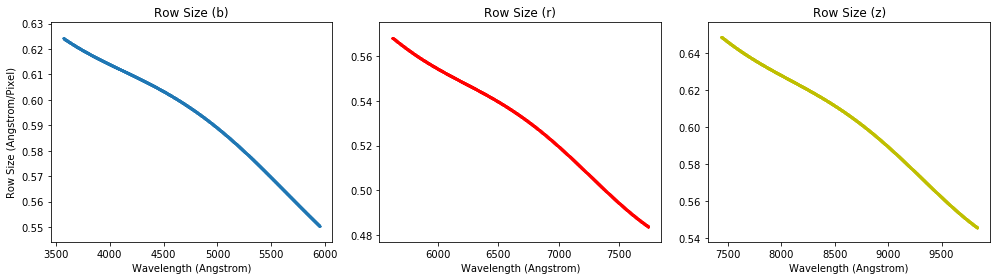

In [273]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))


#units are in Angstroms/Pixel
ax1.scatter(quicksim_b['wavelength'], quicksim_b['angstroms_per_row'], s=1)
ax2.scatter(quicksim_r['wavelength'], quicksim_r['angstroms_per_row'], s=1, c='r')
ax3.scatter(quicksim_z['wavelength'], quicksim_z['angstroms_per_row'], s=1, c='y')

ax1.set_title('Row Size (b)')
ax1.set_xlabel('Wavelength (Angstrom)')
ax1.set_ylabel('Row Size (Angstrom/Pixel)')
ax2.set_title('Row Size (r)')
ax2.set_xlabel('Wavelength (Angstrom)')
ax3.set_title('Row Size (z)')
ax3.set_xlabel('Wavelength (Angstrom)')

plt.tight_layout()
plt.show()

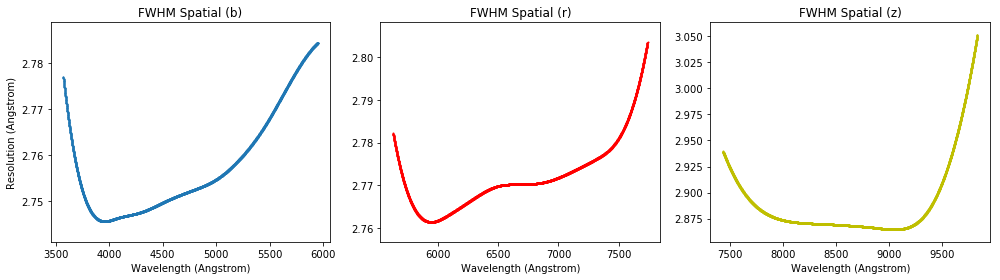

In [289]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))


#wave vs spatial???
ax1.scatter(quicksim_b['wavelength'], quicksim_b['fwhm_spatial'], s=1)
ax2.scatter(quicksim_r['wavelength'], quicksim_r['fwhm_spatial'], s=1, c='r')
ax3.scatter(quicksim_z['wavelength'], quicksim_z['fwhm_spatial'], s=1, c='y')

ax1.set_title('FWHM Spatial (b)')
ax1.set_xlabel('Wavelength (Angstrom)')
ax1.set_ylabel('Resolution (Angstrom)')
ax2.set_title('FWHM Spatial (r)')
ax2.set_xlabel('Wavelength (Angstrom)')
ax3.set_title('FWHM Spatial (z)')
ax3.set_xlabel('Wavelength (Angstrom)')

plt.tight_layout()
plt.show()

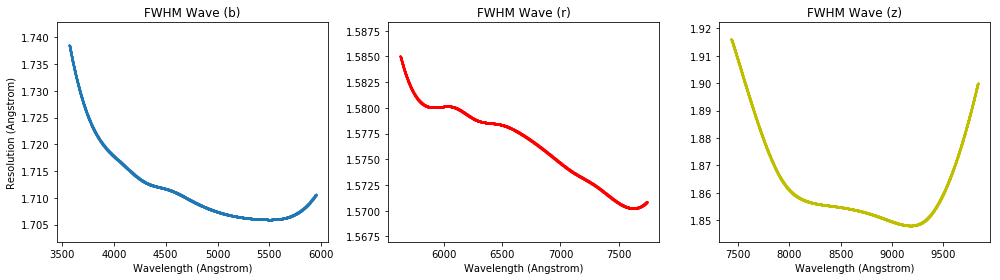

In [290]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))


#wave vs spatial???
ax1.scatter(quicksim_b['wavelength'], quicksim_b['fwhm_wave'], s=1)
ax2.scatter(quicksim_r['wavelength'], quicksim_r['fwhm_wave'], s=1, c='r')
ax3.scatter(quicksim_z['wavelength'], quicksim_z['fwhm_wave'], s=1, c='y')

ax1.set_title('FWHM Wave (b)')
ax1.set_xlabel('Wavelength (Angstrom)')
ax1.set_ylabel('Resolution (Angstrom)')
ax2.set_title('FWHM Wave (r)')
ax2.set_xlabel('Wavelength (Angstrom)')
ax3.set_title('FWHM Wave (z)')
ax3.set_xlabel('Wavelength (Angstrom)')

plt.tight_layout()
plt.show()

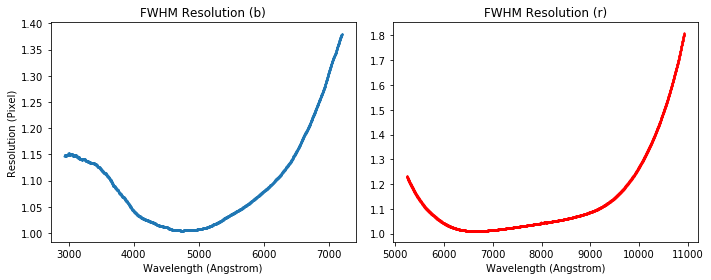

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.scatter(bwlen[60:-80], bres_median/bwidth_median, s=1)
ax2.scatter(rwlen[60:-80], rres_median/rwidth_median, s=1, c='r')

ax1.set_title('FWHM Resolution (b)')
ax1.set_xlabel('Wavelength (Angstrom)')
ax1.set_ylabel('Resolution (Pixel)')
ax2.set_title('FWHM Resolution (r)')
ax2.set_xlabel('Wavelength (Angstrom)')
plt.tight_layout()
plt.show()

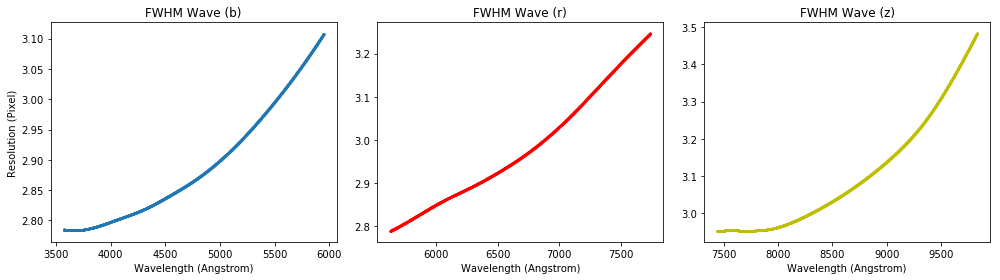

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))


#wave vs spatial == horizontal vs vertical
ax1.scatter(quicksim_b['wavelength'], quicksim_b['fwhm_wave']/quicksim_b['angstroms_per_row'], s=1)
ax2.scatter(quicksim_r['wavelength'], quicksim_r['fwhm_wave']/quicksim_r['angstroms_per_row'], s=1, c='r')
ax3.scatter(quicksim_z['wavelength'], quicksim_z['fwhm_wave']/quicksim_z['angstroms_per_row'], s=1, c='y')

ax1.set_title('FWHM Wave (b)')
ax1.set_xlabel('Wavelength (Angstrom)')
ax1.set_ylabel('Resolution (Pixel)')
ax2.set_title('FWHM Wave (r)')
ax2.set_xlabel('Wavelength (Angstrom)')
ax3.set_title('FWHM Wave (z)')
ax3.set_xlabel('Wavelength (Angstrom)')

plt.tight_layout()
plt.show()

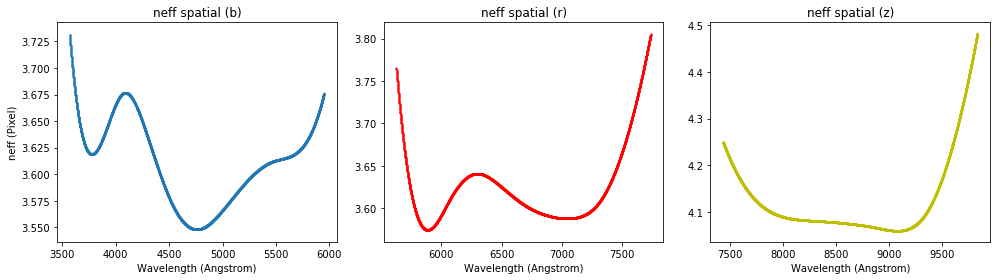

In [275]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))

ax1.scatter(quicksim_b['wavelength'], quicksim_b['neff_spatial'], s=1)
ax2.scatter(quicksim_r['wavelength'], quicksim_r['neff_spatial'], s=1, c='r')
ax3.scatter(quicksim_z['wavelength'], quicksim_z['neff_spatial'], s=1, c='y')

ax1.set_title('neff spatial (b)')
ax1.set_xlabel('Wavelength (Angstrom)')
ax1.set_ylabel('neff (Pixel)')
ax2.set_title('neff spatial (r)')
ax2.set_xlabel('Wavelength (Angstrom)')
ax3.set_title('neff spatial (z)')
ax3.set_xlabel('Wavelength (Angstrom)')

plt.tight_layout()
plt.show()

### Check to see if higher neff in DESI makes sense wrt the size of the CCD

##### DESI (all 4k x 4k)
"Each of the three channels of a spectrograph will use a 4k×4k CCD with 15 μm pixels." 
http://desi.lbl.gov/wp-content/uploads/2014/04/fdr-instrument-biblatex2.pdf

##### eBOSS (red: 4k x 4k; blue: 4112 (vertical) x 4096 (horizontal))
http://www.e2v.com/products/imaging/ccd-image-sensors-for-space-and-ground-based-astronomy/

http://www.sdss.org/instruments/boss_spectrograph/

In [59]:
#eBOSS red
print((4*1024.)/500)

#sdss red
print((2*1024.)/500)

#eBOSS blue
print(4112./500)

8.192
4.096
8.224


In [39]:
4*1024

4096

In [72]:
exposure_time = 1000 * u.s
read_noise = 2.0 * u.electron / u.pixel**2
dark_current = 3.0 * u.electron / u.hour / u.pixel**2

In [75]:
read_noise.value

2.0

In [76]:
dark_noise = np.sqrt((dark_current * exposure_time).value)
total_noise = np.sqrt(dark_current.value ** 2 + read_noise.value ** 2)

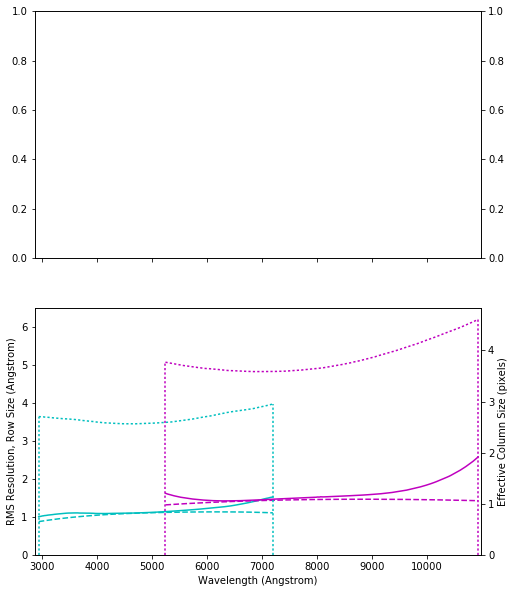

In [94]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 10))

ax1_rhs = ax1.twinx()
ax2_rhs = ax2.twinx()

#wavelength resolution -- blue
ax2.plot(bwlen[60:-80], bres_median, c='c', label='Resolution (blue)')

#wavelength resolution -- red
ax2.plot(rwlen[60:-80], rres_median, c='m', label='Resolution (red)')

#row size -- blue
ax2.plot(bwlen[60:-80], bwidth_median, c='c', ls='--', label='Row size (blue)')

#row size -- red
ax2.plot(rwlen[60:-80], rwidth_median, c='m', ls='--', label='Row size (red)')

#column size -- blue
ax2.plot(bwlen[60:-80], bneff_median, c='c', ls=':', label='Column size (blue)')
ax2.plot((bwlen[60], bwlen[60]), (0, bneff_median[0]), c='c', ls=':')
ax2.plot((bwlen[-80], bwlen[-80]), (0, bneff_median[-1]), c='c', ls=':')

#column size -- red
ax2_rhs.plot(rwlen[60:-80], rneff_median, c='m', ls=':', label='Column size (red)')
ax2_rhs.plot((rwlen[60], rwlen[60]), (0, rneff_median[0]), c='m', ls=':')
ax2_rhs.plot((rwlen[-80], rwlen[-80]), (0, rneff_median[-1]), c='m', ls=':')



ax2_rhs.set_ylabel('Effective Column Size (pixels)')
ax2_rhs.set_ylim(0., None)
ax2.set_xlabel('Wavelength (Angstrom)')
ax2.set_ylabel('RMS Resolution, Row Size (Angstrom)')
ax2.set_xlim(bwlen[60]-75,rwlen[-80]+50)
ax2.set_ylim(0,6.5)
plt.show()